## FLIP ROBO TECHNOLOGIES


# Used Car Price Prediction

## Problem Statement:
### With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. 

### Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   
from sklearn.preprocessing import PowerTransformer  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
# Reading excel file
df = pd.read_csv("UsedCarsDetails.csv")
df

,Unnamed: 0,Car_Name,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,Car_price
0,0,2016 Honda Jazz,Petrol,"39,821 kms",1199,Automatic,17.1,5,Golden Brown Metallic,88.50,Disc,Drum,354,1544,1694,3989,-,9,-,6.28 Lakh
1,1,2018 Mahindra Marazzo,Diesel,"41,071 kms",1497,Manual,17.3,7,Aqua Marine,121,Disc,Disc,190,1774,1866,4585,-,9.5,145kmph,10.15 Lakh
2,2,2015 Hyundai Grand i10,Petrol,"67,525 kms",1197,Manual,18.9,5,Pure white,82,Disc,Drum,256-liters,1520,1660,3765,-,7.5,165 Kmph,4.51 Lakh
3,3,2019 Jeep Compass,Petrol,"32,294 kms",1368,Automatic,16,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,-,9.5,186.69 kmph,16.78 Lakh
4,4,2016 Honda City,Petrol,"25,542 kms",1497,Manual,17.8,5,Golden,117.3,Disc,Drum,510-litres,1495,1695,4440,-,8.5,195 Kmph,7.33 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,5685,2017 Hyundai Grand i10,Petrol,"43,052 kms",1197,Manual,18.9,5,Red,81.86,Disc,Drum,256,1520,1660,3765,-,9,165 Kmph,4.23 Lakh
5686,5686,2016 Hyundai Creta,Diesel,"69,000 kms",1582,Automatic,17.6,5,Silver,126.2,Disc,Drum,400,1665,1780,4270,-,-,-,8.95 Lakh
5687,5687,2018 Mercedes-Benz GLA Class,Diesel,"55,000 kms",2143,Automatic,17.9,5,Red,136,Disc,Disc,421-litres,1494,1804,4424,2020,-,205 Kmph,24.75 Lakh
5688,5688,2017 Toyota Corolla Altis,Petrol,"60,000 kms",1798,Automatic,14.28,5,Silver,138.03,Ventilated Disc,Solid Disc,470-litres,1475,1776,4620,1640,-,200 Kmph,12.90 Lakh


The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable **"Car_Price"** which stores the price of the used cars and it is continuous in nature which makes this to be a **"Regression Problem"**.

## Data Description (Attribute Information)

|Serial No||Variable||Definition|
|--------------------||--------------------||--------------------|
|1||Car_Name||Name of the cars with manufacturing year|
|2||Fuel_type||Type of fuel used for car engine|
|3||Kilometers||Car running in kms till the date|
|4||Engine_disp||Engine displacement/engine CC|
|5||Gear_transmission||Type of gear transmission used in car|
|6||Milage_in_km/ltr||Overall milage of car in Km/ltr|
|7||Seating_cap||Number of seats available in the car|
|8||color||Color of the car|
|9||Max_power||Maximum power of engine used in car in bhp|
|10||front_brake_type||Type of brake system used for front-side wheels|
|11||rear_brake_type||Type of brake system used for back-side wheels|
|12||cargo_volume||Total cubic feet of space in a car's cargo area|
|13||height||Total height of car in mm|
|14||width||Width of car in mm|
|15||length||Total length of the car in mm|
|16||Weight||Gross weight of the car in kg|
|17||Insp_score||Inspection rating out of 10|
|18||top_speed||Maximum speed limit of the car in km per hours|
|19||Car_price||Price of the car|

# Exploratory Data Analysis (EDA)

In [3]:
# To display maximum columns in the dataset
pd.set_option("display.max_columns",None)
# To display maximum rows in the dataset
#pd.set_option("display.max_rows",None)

Displaying maximum rows and columns present in the dataset.

In [4]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()   # Diapaying the dataframe

,Car_Name,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,Car_price
0,2016 Honda Jazz,Petrol,"39,821 kms",1199,Automatic,17.1,5,Golden Brown Metallic,88.50,Disc,Drum,354,1544,1694,3989,-,9,-,6.28 Lakh
1,2018 Mahindra Marazzo,Diesel,"41,071 kms",1497,Manual,17.3,7,Aqua Marine,121,Disc,Disc,190,1774,1866,4585,-,9.5,145kmph,10.15 Lakh
2,2015 Hyundai Grand i10,Petrol,"67,525 kms",1197,Manual,18.9,5,Pure white,82,Disc,Drum,256-liters,1520,1660,3765,-,7.5,165 Kmph,4.51 Lakh
3,2019 Jeep Compass,Petrol,"32,294 kms",1368,Automatic,16,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,-,9.5,186.69 kmph,16.78 Lakh
4,2016 Honda City,Petrol,"25,542 kms",1497,Manual,17.8,5,Golden,117.3,Disc,Drum,510-litres,1495,1695,4440,-,8.5,195 Kmph,7.33 Lakh


Removed unwanted column "Unnamed: 0" from the dataset since it was only storing the index data and was not a worthy feature column for prediction. We can obsrve first 5 rows of the dataset.

In [5]:
# Checking the dimensions of the dataset
print("There are {} rows and {} columns in our dataframe".format(df.shape[0], df.shape[1]))

There are 5690 rows and 19 columns in our dataframe


The dataset contains 5690 rows and 19 columns. Out of 19 columns 18 are independent variables and remaining one is our target variable "Car_price" which is dependent in nature.

In [6]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Car_Name', 'Fuel_type', 'Kilometers', 'Engine_disp', 'Gear_type',
       'Milage_in_km/ltr', 'Seating_cap', 'color', 'Max_power',
       'front_brake_type', 'rear_brake_type', 'cargo_volume', 'height',
       'width', 'length', 'Weight', 'Insp_score', 'top_speed', 'Car_price'],
      dtype='object')


These are the columns present in our dataset.

In [7]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Car_Name,1184
Fuel_type,5
Kilometers,2736
Engine_disp,143
Gear_type,2
Milage_in_km/ltr,455
Seating_cap,9
color,261
Max_power,437
front_brake_type,29


Above are the number of unique values present in each of the columns of the dataset.

In [8]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5690 entries, 0 to 5689
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Car_Name          5690 non-null   object
 1   Fuel_type         5690 non-null   object
 2   Kilometers        5690 non-null   object
 3   Engine_disp       5690 non-null   object
 4   Gear_type         5690 non-null   object
 5   Milage_in_km/ltr  5690 non-null   object
 6   Seating_cap       5690 non-null   object
 7   color             5690 non-null   object
 8   Max_power         5690 non-null   object
 9   front_brake_type  5689 non-null   object
 10  rear_brake_type   5689 non-null   object
 11  cargo_volume      5689 non-null   object
 12  height            5689 non-null   object
 13  width             5689 non-null   object
 14  length            5689 non-null   object
 15  Weight            5689 non-null   object
 16  Insp_score        5690 non-null   object
 17  top_speed     

- This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.
- The dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.
- Since counts of some of the columns are different, which means there are null values present in the dataset.

## Data Pre-processing
From our dataset we can notice most of the columns contains corrupted values so that we need to go through lot of data-processing steps. Let's do some of the pre-processing methods on our dataset.

From the dataset we can observe there are some columns having values with "-" sign, so we will treat them as NAN values. Let's take a quick look at the columns having "-" sign by using below code.

In [9]:
# Checking which columns contains "-" sign 
df[df.columns[(df == '-').any()]].nunique()

Engine_disp         143
Milage_in_km/ltr    455
Seating_cap           9
color               261
Max_power           437
front_brake_type     29
rear_brake_type      32
cargo_volume        296
height              281
width               262
length              348
Weight              258
Insp_score           10
top_speed           266
dtype: int64

These are the columns having "-" sign with number of unique values present in the particular column.

In [10]:
# Displaying the columns containing "-" sign count and their % i.e. ((count of "-")/5690)/100

unwanted_value = pd.DataFrame(df.isin(["-"]).sum().sort_values(ascending=False))
unwanted_value.columns=['Count of "-"']
unwanted_value['% of "-" sign']=unwanted_value['Count of "-"']/56.90     # 5690)/100 = 56.90
unwanted_value

,"Count of ""-""","% of ""-"" sign"
Insp_score,4829,84.868190
Weight,2942,51.704745
top_speed,2099,36.889279
cargo_volume,990,17.398946
Milage_in_km/ltr,228,4.007030
front_brake_type,136,2.390158
rear_brake_type,136,2.390158
length,128,2.249561
height,128,2.249561
width,128,2.249561


From the above output we can notice the columns having "-" sign. The columns "Insp_score" and "Weight" have more than 50% of "-" sign. So, we can drop those columns. And we will treat the remaining columns having these sign as NAN values, so that we can easily treat them using appropriate imputation techniques. 

In [11]:
# Dropping the columns having more than 50% of "-" sign
df.drop(["Insp_score", "Weight"],axis=1,inplace=True)

I have dropped the columns which are not necessary to our predictions. 


Now Replacing '-' with NAN values

In [12]:
# Replacing the sign as NAN values
df.replace('-',np.nan, inplace = True)
df.replace('null',np.nan, inplace = True)

We have replaced "-" sign and the entry "null" as nan value. 

## Feature Engineering 

Some of the features like "Car_Name", "Running_in_kms", "Milage_in_km/ltr", "City_url", "Max_power", "front_brake_type", "rear_brake_type", "Car_price" etc have some irrelevant values like kms, kmpl etc which we need to clean.

### Car_Name
The column Car_Name is containing manufacturing year of the car, Brand name of the car and model name of the car. So, I will be extracting 3 different columns from the column Car_Name.

In [13]:
# Extracting the feature "Manufacturing_year" from Car_Name column
df['Manufacturing_year'] = df['Car_Name'].str[0:4]

# Creating car_name column and storing the remaining values other than year in it. 
df['Car_name'] = df['Car_Name'].str[4:]

# Dropping Car_Name column as I have stored the data in car_name column instead
df.drop(columns = 'Car_Name', axis=1, inplace = True)

In [14]:
# Extracting Brand and Model from Car_name column
df['Brand'] = df.Car_name.str.split(' ').str.get(1)
df['Model'] = df.Car_name.str.split(' ').str[2:]
df['Model'] = df['Model'].apply(lambda x: ','.join(map(str, x)))
df['Model'] = df['Model'].str.replace(',',' ')
df.drop(columns = 'Car_name', axis=1, inplace = True)     # Dropping Car_name column after extraction

In [15]:
# Moving the columns Model, Brand and Manufacturing_year to the first, second & third position of dataframe respectively
df.insert(0, 'Model',df.pop('Model'))
df.insert(1, 'Brand',df.pop('Brand'))
df.insert(2, 'Manufacturing_year',df.pop('Manufacturing_year'))
df.head()

,Model,Brand,Manufacturing_year,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_price
0,Jazz,Honda,2016,Petrol,"39,821 kms",1199,Automatic,17.1,5,Golden Brown Metallic,88.50,Disc,Drum,354,1544,1694,3989,NaN,6.28 Lakh
1,Marazzo,Mahindra,2018,Diesel,"41,071 kms",1497,Manual,17.3,7,Aqua Marine,121,Disc,Disc,190,1774,1866,4585,145kmph,10.15 Lakh
2,Grand i10,Hyundai,2015,Petrol,"67,525 kms",1197,Manual,18.9,5,Pure white,82,Disc,Drum,256-liters,1520,1660,3765,165 Kmph,4.51 Lakh
3,Compass,Jeep,2019,Petrol,"32,294 kms",1368,Automatic,16,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,186.69 kmph,16.78 Lakh
4,City,Honda,2016,Petrol,"25,542 kms",1497,Manual,17.8,5,Golden,117.3,Disc,Drum,510-litres,1495,1695,4440,195 Kmph,7.33 Lakh


As we can see, we have successfully extracted the features Manufacturing_year, Brand and Model from Car_name column and moved these columns from last position to starting position of the dataframe using pop() method.

### Kilometers

The column "Kilometers" is showing object data type since it is having some string value like kms, and "," sign in it. But it should be continuous data so, I will remove string value "kms" and the comma sign "," by replacing them with empty space and then convert the column into float data type.

In [16]:
# Replacing kms and "," sign by empty space from the column
df['Kilometers'] = df['Kilometers'].str.replace('kms','')
df['Kilometers'] = df['Kilometers'].str.replace(',','')

In [17]:
# Converting object data type into float data type
df['Kilometers'] = df['Kilometers'].astype('float')

I have successfully converted string values and comma sign from the column and also converted object data type of "Running_in_kms" column into float data type. 

### Car_price

The target variable "Car_price" should be continuous data but due to some string values like "Lakh", "Cr" and "," it is showing as object data type. So, we will replace 'Lakh' by 100000, 'Cr' by 10000000 and "," by empty space. Then we will split it into two columns as price_a and price_b, where price_a column to be having numerical entries (like 5.50, 4.50 etc) which are present in the Car_price column and price_b column to be having string values like "Lakh", "Cr". That is storing numerical values in price_a column and string values in price_b column and after that multiply these two columns to get exact car price in numerical format.

In [18]:
# Replacing string values and "," sign 
df['Car_Price'] = df['Car_price'].str.replace('Lakh','100000')
df['Car_Price'] = df['Car_Price'].str.replace(',','')
df['Car_Price'] = df['Car_Price'].str.replace('Cr','10000000')

In [19]:
# Splitting the column into two columns
df[['price_a','price_b']] = df.Car_Price.str.split(expand=True)

In [20]:
# Converting object data type into float data type
df['price_a'] = df['price_a'].astype('float')
df['price_b'] = df['price_b'].astype('float')

In [21]:
# Checking null values to confirm if the target column contains any missing values after splitting it
print("No of null values in price_a is:",df.price_a.isnull().sum())
print("No of null values in price_b is:",df.price_b.isnull().sum())

No of null values in price_a is: 0
No of null values in price_b is: 50


As we can observe there are 50 missing values in the column after splitting target variable. As the column price_b contains string values like "Lakh" and "Cr" so, we will fill the null values by 1. 

In [22]:
# Filling null values in price_b column by 1
df['price_b']=df['price_b'].fillna(value = 1)

In [23]:
# Multiplying the two columns to get exact price of the car
df['Car_Price'] = df['price_a'] * df['price_b']

Now we have got our target variable cleaned and it is continuous also having float data type. Let's drop the unwanted columns which I have created to get the exact price.

In [24]:
# Dropping unwanted columns
df.drop(columns = ['Car_price','price_a','price_b'], axis=1, inplace = True)

In [25]:
# Checking dataframe after cleaning target column
df.head()

,Model,Brand,Manufacturing_year,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_Price
0,Jazz,Honda,2016,Petrol,39821.0,1199,Automatic,17.1,5,Golden Brown Metallic,88.50,Disc,Drum,354,1544,1694,3989,NaN,628000.0
1,Marazzo,Mahindra,2018,Diesel,41071.0,1497,Manual,17.3,7,Aqua Marine,121,Disc,Disc,190,1774,1866,4585,145kmph,1015000.0
2,Grand i10,Hyundai,2015,Petrol,67525.0,1197,Manual,18.9,5,Pure white,82,Disc,Drum,256-liters,1520,1660,3765,165 Kmph,451000.0
3,Compass,Jeep,2019,Petrol,32294.0,1368,Automatic,16,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,186.69 kmph,1678000.0
4,City,Honda,2016,Petrol,25542.0,1497,Manual,17.8,5,Golden,117.3,Disc,Drum,510-litres,1495,1695,4440,195 Kmph,733000.0


As we can observe, the target column has been cleaned which is now continuous.

### Milage_in_km/ltr
The column "Milage_in_km/ltr" is also having some string values like "kmpl", "km/kg" and "km/hr" so, I will be removing/ replacing by empty space and converting column from object data type into float data type.

In [26]:
# Replacing string values by empty space
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')
# Converting object data type into float data type
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

### Max_power
The column "Max_power" contains some string values like PS, ps, Bh and P. Let's replace them as well and we will convert this column to float datatype.

In [32]:
df['Max_power'].value_counts

<bound method IndexOpsMixin.value_counts of 0       88.50
1         121
2          82
3       160.7
4       117.3
        ...  
5685    81.86
5686    126.2
5687      136
5688    138.0
5689     55.2
Name: Max_power, Length: 5690, dtype: object>

In [47]:
# Getting numerical values from column "Max_power" and replacing the string values
df["Max_power"] = df["Max_power"].str[0:5]

df["Max_power"] = df["Max_power"].str.replace("PS",'')
df["Max_power"] = df["Max_power"].str.replace("ps",'')
df["Max_power"] = df["Max_power"].str.replace("Bh",'')
df["Max_power"] = df["Max_power"].str.replace("P",'')
df['Max_power'] = df['Max_power'].str.replace("[","")
df['Max_power'] = df['Max_power'].str.replace("k","")
df['Max_power'] = df['Max_power'].str.replace("(",".")
df['Max_power'] = df['Max_power'].str.replace("a","")
df['Max_power'] = df['Max_power'].str.replace("H","")
df['Max_power'] = df['Max_power'].str.replace("h","")

In [48]:
# Converting Max_power into float datatype
df.Max_power = df.Max_power.astype('float')

We have replaced string values present in the column Max_power and converted it into float data type as well.

### front_brake_type
The column "front_brake_type" is having some duplicate entries that is they belongs to same categories so, we will replace/group the same categories by appropriate values.

In [49]:
# Checking the value count of the column "front_brake_type"
df.front_brake_type.value_counts()

Disc                                          3467
Ventilated Disc                               1827
Solid Disc                                      58
Ventilated Discs                                42
Disc & Caliper Type                             41
Disk                                            24
Ventilated discs                                18
Ventilated DIsc                                 17
Multilateral Disc                                9
Ventilated Disk                                  8
Single Piston Sliding Caliper, Vented Disc       5
Electric Parking Brake                           5
disc                                             4
Vantilated Disc                                  4
Disc & Drum                                      3
Disc, 236 mm                                     3
Disc,internally ventilated                       2
Ventlated Disc                                   2
Drum                                             2
Booster assisted ventilated dis

From the value count of the column "front_brake_type" we can observe some of the entries having similar categories, let's group them according to their category.

In [60]:
# Grouping the entries which are similar to Disc 
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

# Grouping the entries which are similar to Ventilated Discs 
df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [61]:
# Checking the value counts of the column after grouping
df["front_brake_type"].value_counts()

Disc                                          3558
Ventilated Disc                               1922
Disc & Caliper Type                             41
Multilateral Disc                                9
Electric Parking Brake                           5
Single Piston Sliding Caliper, Vented Disc       5
Disc & Drum                                      3
Drum                                             2
Booster assisted ventilated disc                 2
Disc,internally ventilated                       2
Dual Circuit with ABS, ABS with BAS              1
Ventilated & Grooved Steel Discs                 1
8-piston caliper front brakes                    1
Vacuum assisted hydraulic dual circuit w         1
Name: front_brake_type, dtype: int64

### rear_brake_type

In [62]:
# Checking the value counts of the column "rear_brake_type"
df.rear_brake_type.value_counts()

Drum                                          3830
Disc                                          1314
Ventilated Disc                                269
Leading-Trailing Drum                           53
Disc & Caliper Type                             41
Self-Adjusting Drum                             16
Ventilated Drum                                  5
Electric Parking Brake                           5
Disc & Drum                                      5
Single Piston Sliding Caliper, Vented Disc       5
Booster assisted drum                            2
Drum in disc                                     2
disc                                             1
Drum`                                            1
Dual Circuit with ABS, ABS with BAS              1
Ventilated & Grooved Steel Discs                 1
Perforated disc brakes                           1
Vacuum assisted hydraulic dual circuit w         1
Name: rear_brake_type, dtype: int64

With the help of value count funtion we can notice some of the entries in the column "rear_brake_type" having similar categories, let's group them.

In [63]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)

df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Discs","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("ventilated disc","Ventilated Disc",inplace=True)



df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

df["rear_brake_type"].replace("262mm Disc & Drum Combination","Disc & Drum",inplace=True)

df["rear_brake_type"].replace("Drum in Discs","Drum in disc",inplace=True)

In [64]:
# Checking the value counts of the column after grouping
df.rear_brake_type.value_counts()

Drum                                          3830
Disc                                          1314
Ventilated Disc                                269
Leading-Trailing Drum                           53
Disc & Caliper Type                             41
Self-Adjusting Drum                             16
Ventilated Drum                                  5
Electric Parking Brake                           5
Disc & Drum                                      5
Single Piston Sliding Caliper, Vented Disc       5
Booster assisted drum                            2
Drum in disc                                     2
disc                                             1
Drum`                                            1
Dual Circuit with ABS, ABS with BAS              1
Ventilated & Grooved Steel Discs                 1
Perforated disc brakes                           1
Vacuum assisted hydraulic dual circuit w         1
Name: rear_brake_type, dtype: int64

We have now grouped the similar categories present in the columns. 

From the dataset we can also observe some of the features like "Engine_disp", "height", "width", "length", "Weight", "top_speed", and "Seating_cap" have numeircal data (float type) but due to the presence of "," sign, it's showing object datatype. Let's replace "," sign by empty space and convert the columns into float datatype as these columns contains continuous data.

### Engine_disp

In [65]:
# Converting "Engine_disp" column from object to float data type as it is containing continuous data
df.Engine_disp = df.Engine_disp.astype('float')

### height

In [66]:
# Replacing "," sign by empty space and "-" by in the column "height"
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]   # Getting numerical entries

# Converting the column into float data type
df.height = df.height.astype('float')

### width & length

In [67]:
# Replacing "," sign by empty space in the columns "width" & "length"
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')

# Converting the columns into float data type
df.width = df.width.astype('float')
df.length = df.length.astype('float')

### top_speed

In [68]:
# Getting numerical values from "top_speed" column
df['top_speed'] = df['top_speed'].str[0:3]

# Converting column into float datatype
df.top_speed = df.top_speed.astype('float')

### Seating_cap

In [69]:
# Converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

### Manufacturing_year

The column "Manufacturing_year" give the car made year, here using "Manufacturing_year" column I will be extracting new column as "Car_age" which shows us that how old the car is. 

In [70]:
# Checking the value counts of the column "Manufacturing_year"
df.Manufacturing_year.value_counts()

2018    710
2017    694
2015    618
2016    584
2014    513
2019    500
2013    374
2020    355
2012    333
2021    330
2011    215
2010    135
2009     80
2022     73
2008     62
2007     59
2006     20
2004     12
2005     11
2003     10
2001      1
2002      1
Name: Manufacturing_year, dtype: int64

With the help of value count function we can notice that the dataset contains the cars whose manufactured year starts from 2001-2018. So, we will subtract the cars' made year from 2022 to get the exact age of the cars. Also, we need to convert the column from object datatype into float datatype as it is continuous data.

In [ ]:
# Converting the column into float datatype
df.Manufacturing_year = df.Manufacturing_year.astype('float')

# Subtracting the Manufacturing_year from year 2021 to extract the column "Car_age" 
df['Car_age'] = 2022 - df['Manufacturing_year']

# Dropping the column "Manufacturing_year" as we have extracted age of the cars
df.drop(columns = 'Manufacturing_year', inplace = True)

### Cargo_volume

In [80]:
df.cargo_volume.value_counts()

510         332
400         258
480         181
339         157
295         137
           ... 
500?2050      1
620           1
366           1
200           1
440           1
Name: cargo_volume, Length: 170, dtype: int64

In [82]:
df['cargo_volume']=df['cargo_volume'].str.replace("litre","")
df['cargo_volume']=df['cargo_volume'].str.replace("Litre","")
df['cargo_volume']=df['cargo_volume'].str.replace("-","")
df['cargo_volume']=df['cargo_volume'].str.replace("s","")
df['cargo_volume']=df['cargo_volume'].str.replace("Liters","")
df['cargo_volume']=df['cargo_volume'].str.replace("liters","")
df['cargo_volume']=df['cargo_volume'].str.replace("liter","")
df['cargo_volume']=df['cargo_volume'].str.replace("lit","")
df['cargo_volume']=df['cargo_volume'].str.replace("Lit","")
df['cargo_volume']=df['cargo_volume'].str.replace("l","")
df['cargo_volume']=df['cargo_volume'].str.replace("L","")
df['cargo_volume']=df['cargo_volume'].str.replace(" ","")
df['cargo_volume']=df['cargo_volume'].str.replace("er","")
df['cargo_volume']=df['cargo_volume'].str.replace("tr","")
df['cargo_volume']=df['cargo_volume'].str.replace("(3rdRowFoded)","")
df['cargo_volume']=df['cargo_volume'].str.replace("(","")
df['cargo_volume']=df['cargo_volume'].str.replace(")","")
df['cargo_volume']=df['cargo_volume'].str.replace("?",".")
 

df.cargo_volume=df.cargo_volume.astype('float')

Let's check the datatypes of the features after featuring engineering.

In [83]:
# Checking the datatypes of the columns
df.dtypes

Model                object
Brand                object
Fuel_type            object
Kilometers          float64
Engine_disp         float64
Gear_type            object
Milage_in_km/ltr    float64
Seating_cap         float64
color                object
Max_power           float64
front_brake_type     object
rear_brake_type      object
cargo_volume        float64
height              float64
width               float64
length              float64
top_speed           float64
Car_Price           float64
Car_age             float64
dtype: object

As we can notice after processing our data, the dataset contains object and float types of data. We need to encode the columns having object datatype using appropriate encoding methods before building our ML model.

In [84]:
# Saving the cleaned data into excel file
df.to_csv("Cleaned_used_cars_data.csv")

## Checking null values in the dataset

In [86]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/56.90)/100

df_null = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False))
df_null.columns=['Count of Null Values']
df_null['% of Null Values']=df_null['Count of Null Values']/56.90     # 5690/100 = 56.90
df_null

,Count of Null Values,% of Null Values
top_speed,2130,37.434095
cargo_volume,991,17.416520
Milage_in_km/ltr,228,4.007030
front_brake_type,137,2.407733
rear_brake_type,137,2.407733
height,129,2.267135
width,129,2.267135
length,129,2.267135
Max_power,113,1.985940
color,85,1.493849


Above are the columns containing missing values. We will treat these null values using appropriate imputation techniques.

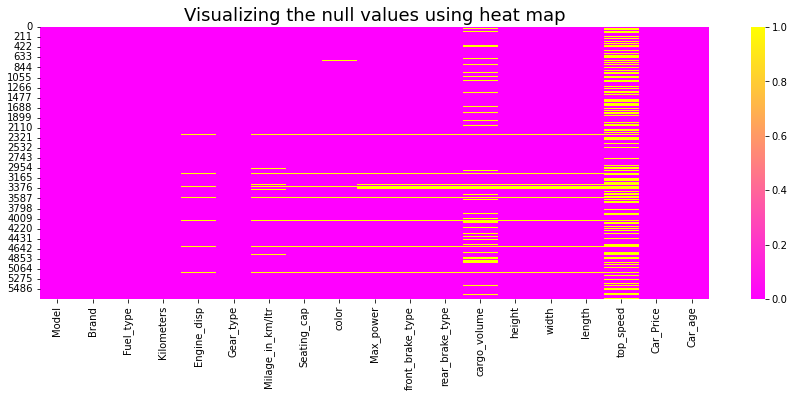

In [88]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="spring")
plt.title("Visualizing the null values using heat map",fontsize=18)
plt.show()

From the heat map we can clearly notice the presence of missing values by looking at the white lines present in the map.

## Treating null values using imputation techniqies

In [89]:
# Checking mean value of the column "length"
print("The mean value of 'length' is:",df["length"].mean())

# Checking the median values of the columns "Engine_disp", "Milage_in_km/ltr", "Max_power", "height", "width", "Weight" and "top_speed"
print("\nThe median value of 'Engine_disp' is:",df["Engine_disp"].median())
print("The median value of 'Milage_in_km/ltr' is:",df["Milage_in_km/ltr"].median())
print("The median value of 'Max_power' is:",df["Max_power"].median())
print("The median value of 'height' is:",df["height"].median())
print("The median value of 'width' is:",df["width"].median())
print("The median value of 'carge_valume' is:",df["cargo_volume"].median())
print("The median value of 'top_speed' is:",df["top_speed"].median())

# Checking the mode values of the categorical columns
print("\nThe mode value of 'Seating_cap' is:",df["Seating_cap"].mode())
print("The mode value of 'color' is:",df["color"].mode())
print("The mode value of 'front_brake_type' is:",df["front_brake_type"].mode())
print("The mode value of 'rear_brake_type' is:",df["rear_brake_type"].mode())

The mean value of 'length' is: 4231.945333573099

The median value of 'Engine_disp' is: 1462.0
The median value of 'Milage_in_km/ltr' is: 18.1
The median value of 'Max_power' is: 103.2
The median value of 'height' is: 1530.0
The median value of 'width' is: 1735.0
The median value of 'carge_valume' is: 400.0
The median value of 'top_speed' is: 176.0

The mode value of 'Seating_cap' is: 0    5.0
dtype: float64
The mode value of 'color' is: 0    White
dtype: object
The mode value of 'front_brake_type' is: 0    Disc
dtype: object
The mode value of 'rear_brake_type' is: 0    Drum
dtype: object


These are the mean, median and mode values. These values will be filled in the place of missing values while we impute them. 

In [90]:
# Filling null values in the column "length" by mean value as it does not contains any outliers and skewness
df["length"] = df["length"].fillna(df["length"].mean())

# Filling null values in the remaining numerical columns using median values as these columns contains outliers 
for i in ['Engine_disp','Milage_in_km/ltr','height','Max_power','cargo_volume','length','width','top_speed']:
    df[i] = df[i].fillna(df[i].median())
    
# Filling null values in the categorical columns using mode values
for j in ['Seating_cap','front_brake_type','rear_brake_type','color']:
    df[j] = df[j].fillna(df[j].mode()[0])

In [91]:
# Checking missing values after using imputation techniques
df.isnull().sum()

Model               0
Brand               0
Fuel_type           0
Kilometers          0
Engine_disp         0
Gear_type           0
Milage_in_km/ltr    0
Seating_cap         0
color               0
Max_power           0
front_brake_type    0
rear_brake_type     0
cargo_volume        0
height              0
width               0
length              0
top_speed           0
Car_Price           0
Car_age             0
dtype: int64

We have successfully imputed the null values using mean, median and mode methods.

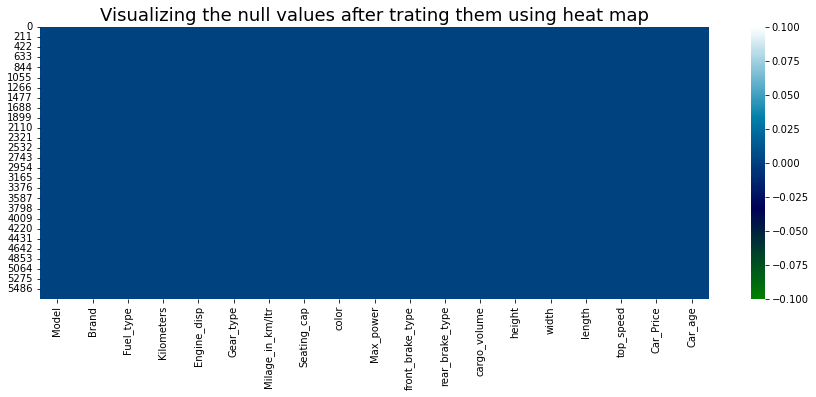

In [92]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="ocean")
plt.title("Visualizing the null values after trating them using heat map",fontsize=18)
plt.show()

It is clear from the heat map that there are no null values in any of the column.

In [93]:
# Checking whether the target column contains any space in it
df.loc[df['Car_Price']==" "]

,Model,Brand,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_Price,Car_age


It seems that there are no spaces in the target column.

In [94]:
# Checking the uniqueness of target column
df["Car_Price"].unique()

array([ 628000., 1015000.,  451000., ..., 6450000., 3800000., 4480000.])

These are the unique values present in the target column.

Great!!! We have successfully cleaned our dataset. Let's take a look at the dataset after cleaning.

In [95]:
# Let us check any duplicate data is available,
df.duplicated().sum()

161

In [96]:
df.drop_duplicates(inplace=True)

In [97]:
# Let's check the dataframe after cleaning 
df.head()

,Model,Brand,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_Price,Car_age
0,Jazz,Honda,Petrol,39821.0,1199.0,Automatic,17.1,5.0,Golden Brown Metallic,88.5,Disc,Drum,354.0,1544.0,1694.0,3989.0,176.0,628000.0,6.0
1,Marazzo,Mahindra,Diesel,41071.0,1497.0,Manual,17.3,7.0,Aqua Marine,121.0,Disc,Disc,190.0,1774.0,1866.0,4585.0,145.0,1015000.0,4.0
2,Grand i10,Hyundai,Petrol,67525.0,1197.0,Manual,18.9,5.0,Pure white,82.0,Disc,Drum,256.0,1520.0,1660.0,3765.0,165.0,451000.0,7.0
3,Compass,Jeep,Petrol,32294.0,1368.0,Automatic,16.0,5.0,Grey,160.7,Disc,Disc,408.0,1640.0,1818.0,4395.0,186.0,1678000.0,3.0
4,City,Honda,Petrol,25542.0,1497.0,Manual,17.8,5.0,Golden,117.3,Disc,Drum,510.0,1495.0,1695.0,4440.0,195.0,733000.0,6.0


In [98]:
# Checking the dimensions of the dataset 
print("Shape of the dataset is:",df.shape)

Shape of the dataset is: (5529, 19)


After cleaning the data we have left with 19 columns and 2931 rows.

## Description of Dataset

In [99]:
# Statistical summary of dataset
df.describe()

,Kilometers,Engine_disp,Milage_in_km/ltr,Seating_cap,Max_power,cargo_volume,height,width,length,top_speed,Car_Price,Car_age
count,5.529000e+03,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5.529000e+03,5529.00000
mean,5.447517e+04,1565.210345,18.512952,5.259721,116.071642,448.768530,1576.786942,1756.887321,4223.904524,179.353771,1.133825e+06,6.22590
std,7.793540e+04,565.354420,4.198579,0.752593,52.410809,3050.969095,122.052636,136.925348,412.898355,23.550251,1.447575e+06,3.40168
min,1.900000e+02,0.000000,7.080000,2.000000,25.500000,73.000000,1249.000000,1410.000000,3099.000000,81.000000,3.000000e+04,0.00000
25%,2.900000e+04,1197.000000,16.000000,5.000000,81.830000,300.000000,1485.000000,1694.000000,3971.000000,170.000000,4.210000e+05,4.00000
50%,5.000000e+04,1462.000000,18.100000,5.000000,103.200000,400.000000,1530.000000,1735.000000,4270.000000,176.000000,6.600000e+05,6.00000
75%,7.100000e+04,1956.000000,20.800000,5.000000,140.000000,475.000000,1645.000000,1818.000000,4500.000000,185.000000,1.270000e+06,8.00000
max,3.990000e+06,6749.000000,120.000000,10.000000,563.000000,160680.000000,1995.000000,2220.000000,5982.000000,313.000000,2.260000e+07,21.00000


The describe() method gives the statistical information of the dataset. The summary of this dataset looks perfect since there are no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things
- The counts of every column is same which means there are no missing values present in the dataset as we are already treated them.
- The min value for "Engine_disp" and "Car_age" is 0, which is not realistic. And looking at the maximum values for columns "Kilometers", "Engine_disp", "Max_power", "width", "length", "Weight", "top_speed" and "Car_Price" we can say that there are outliers present in our data.
- In the column "Milage_in_km/ltr", the median value is bit greater than mean which means the data is skewed to left.
- We need to remove these outliers and skewness except target column using appropriate methodsbefore building our machine learning models.

## Separating numerical and categorical columns

In [100]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Model', 'Brand', 'Fuel_type', 'Gear_type', 'color', 'front_brake_type', 'rear_brake_type']

Numerical columns present in the dataset are:
 ['Kilometers', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'cargo_volume', 'height', 'width', 'length', 'top_speed', 'Car_Price', 'Car_age']


These are the object data type and numerical type columns present in the dataset.

Now it's time to visualize the data.

# Data Visualization
## Univariate Analysis
### Plotting categorical Variables

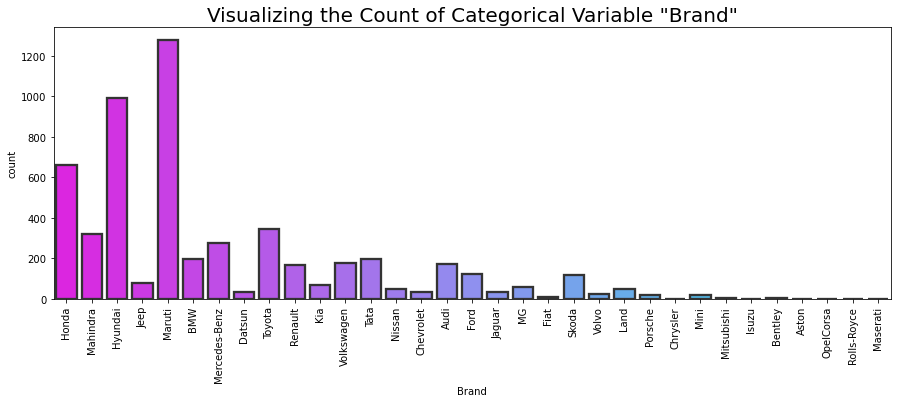

In [101]:
# Plotting count plot for categorical variable "Brand" of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "Brand"',fontsize=20)
sns.countplot(df['Brand'],palette = "cool_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:
- The above count plot gives the count of cars' brand. From the graph we can conclude that we are having most of the cars from Maruti and Hyundai brand as the count is high for these brands.

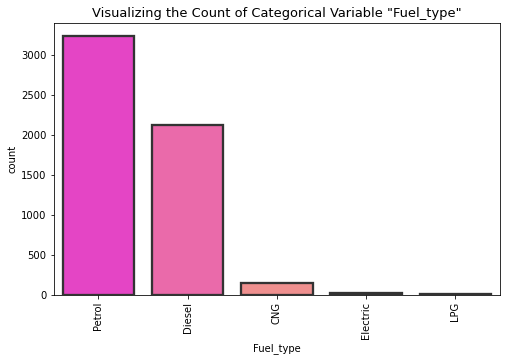

In [102]:
# Plotting count plot for categorical variable "Fuel_type" of the used cars
plt.figure(figsize=(8,5))

plt.title('Visualizing the Count of Categorical Variable "Fuel_type"',fontsize=13)
sns.countplot(df['Fuel_type'],palette ="spring", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:
- The above plot gives the count of fuel types used by the cars. More number of cars are using petrol followed by diesel as fuel. And very few cars uses CNG, LPG and Electricity as fuel type.

Manual       3479
Automatic    2050
Name: Gear_type, dtype: int64


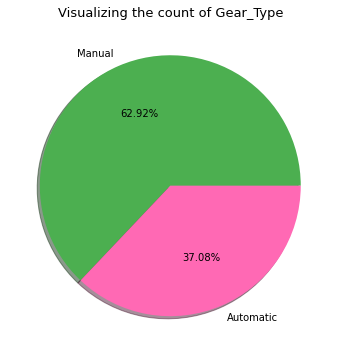

In [103]:
# Visualizing the count of Gear_type of the car 
print(df["Gear_type"].value_counts())
labels='Manual','Automatic'
colors = ["#4CAF50", "hotpink"]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Gear_type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Visualizing the count of Gear_Type",fontsize=13)
plt.show()

### Observations:
- The above plot gives the count of transmission, from this graph we can notice that around 75% of the cars are with Manual gear transmission system and only 25% of the cars are with Automatic gear transmission system.

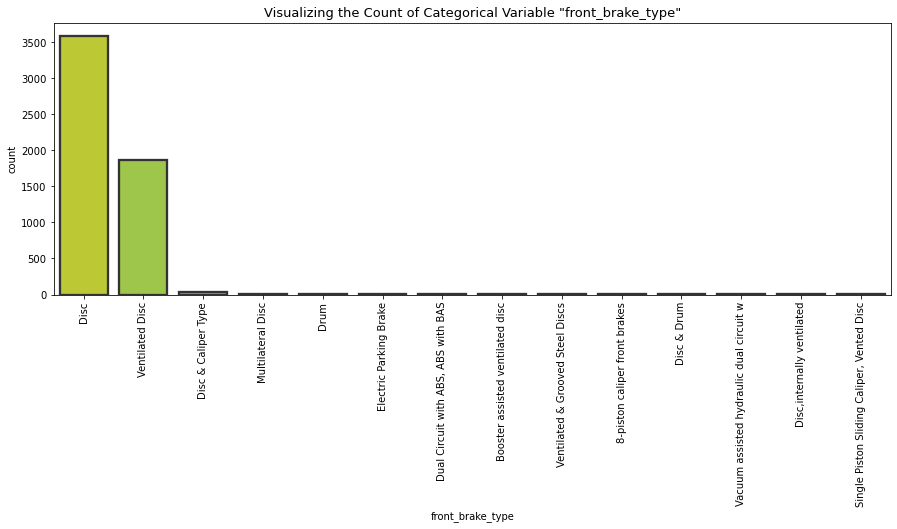

In [104]:
# Visualizinf the counts of front_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "front_brake_type"',fontsize=13)
sns.countplot(df['front_brake_type'],palette ="viridis_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:
- By visualizing the above count plot we can conclude that the cars with Disc and Ventilated Disc type of brake system used for front-side wheels are having high count compared to other brake types.

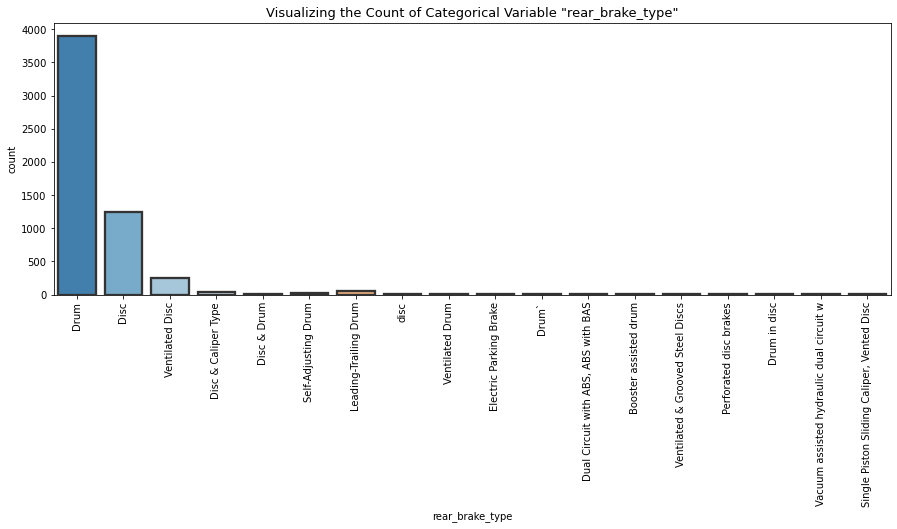

In [105]:
# Visualizinf the counts of rear_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "rear_brake_type"',fontsize=13)
sns.countplot(df['rear_brake_type'],palette ="tab20c", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:
- The above graph represents the count of rear_brake_type of the cars which shows that the cars having Drum type of brake system used for back-side wheels are having high count of around 2000 compared to other type of rear brakes.

## Distribution of skewness
### Plotting Numerical Variables

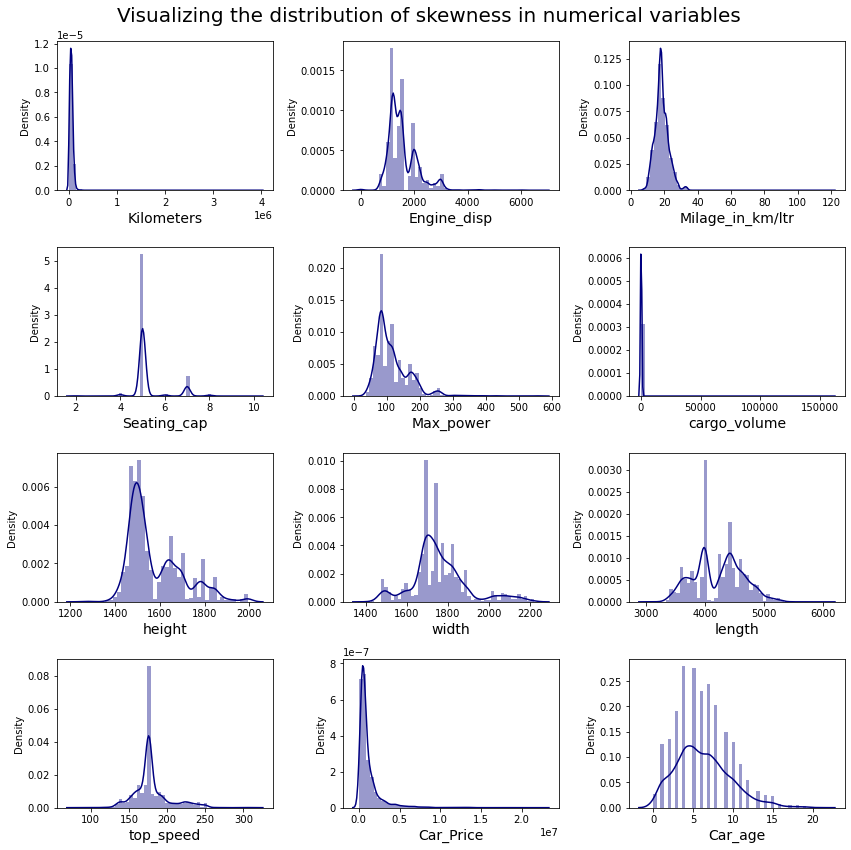

In [106]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color="navy")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

### Observations:
Above plot shows how the data has been distributed in each of the columns.
- From the distribution plots we can observe most of the columns are not normally distributed, only the columns "Milage_in_km/ltr" looks somewhat normal.
- Also, we can notice the columns like "Running_in_kms", "Engine_disp", "Max_power", "Cargo_Volume", "Car_age" etc are skewed to right as the mean value in these columns are much greater than the median(50%).
- The data in the column "height" skewed to left since the mean values is less than the median.
- We need to remove this skewness before building our machine learning models.

## Bivariate Analysis

### Visualizing Categorical Variables vs Car_Price

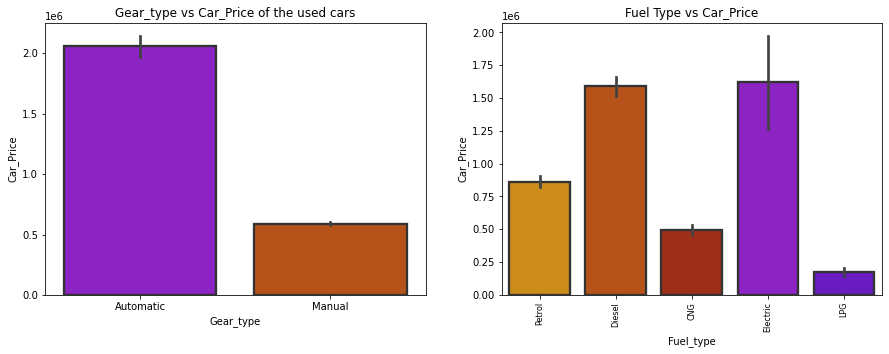

In [107]:
plt.figure(figsize=(15,5))

# Comparing Car_Price and Gear_transmission of the used cars
plt.subplot(1,2,1)
sns.barplot(df['Gear_type'],df['Car_Price'],palette="gnuplot", linewidth=2.3, edgecolor=".2");
plt.title('Gear_type vs Car_Price of the used cars')

# Comparing Car_Price and Location of the used cars
plt.subplot(1,2,2)
sns.barplot(df['Fuel_type'],df['Car_Price'],palette="gnuplot_r", linewidth=2.3, edgecolor=".2");
plt.title('Fuel Type vs Car_Price')
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs Gear_type:** From the bar plot we can observe that the cars which have Automatic gear  system are having high price compared to the cars which have Manual gear  system.
- **Car_Price vs Fuel Type** From the second plot we came to know that the Electric and deisel cars have higher price compared to other models

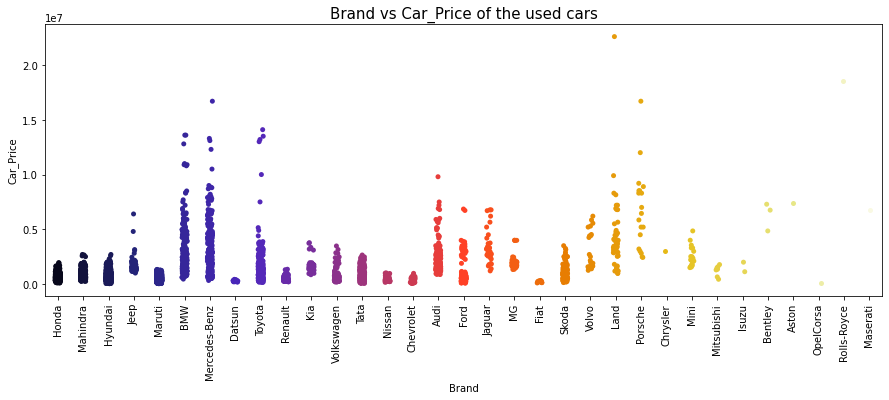

In [108]:
# Comparing Car_Price and Brand of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Brand'],df['Car_Price'],palette="CMRmap");
plt.title('Brand vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs Brand:** The above strip plot shows how the used car prices changes depending on Brands. Here the cars from Rolls_Royce,Mercedes_Benz brand have high price compared to other brands.

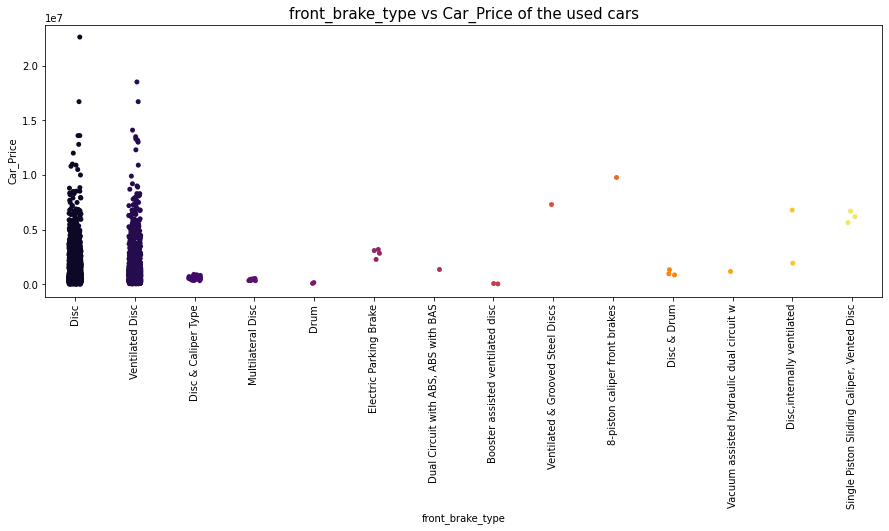

In [109]:
# Comparing Car_Price and front_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['front_brake_type'],df['Car_Price'],palette="inferno");
plt.title('front_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs front_brake_type:** Looking at the above bar plot for front_brake_type vs Car_Price we can say that the cars with Disc and Ventilated Disc system for front wheels are having higher prices than other type of braking systems.

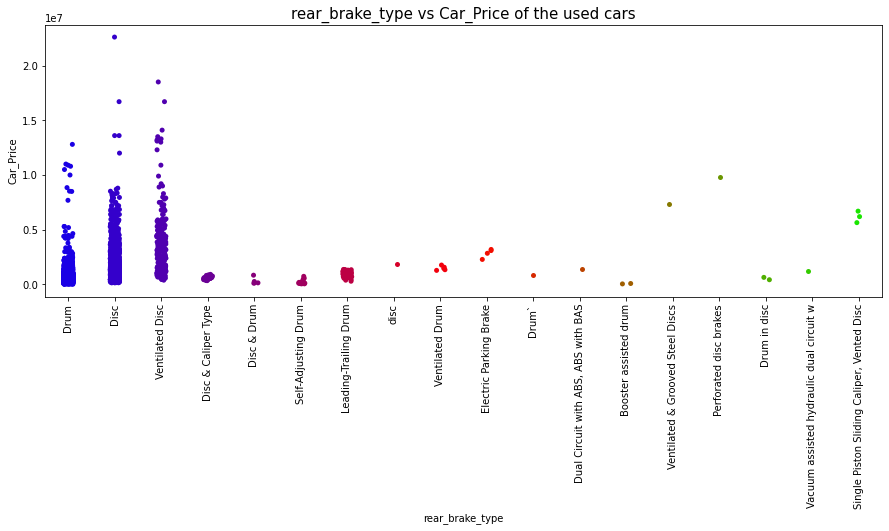

In [110]:
# Comparing Car_Price and rear_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['rear_brake_type'],df['Car_Price'],palette="brg");
plt.title('rear_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs rear_brake_type:** The above graph is representing a barplot for rear_brake_type vs Car_Price which tells us that the cars having Ventilated Disc or Disc or Drum brake system are having higher prices than the cars with other type of braking system at rear side.

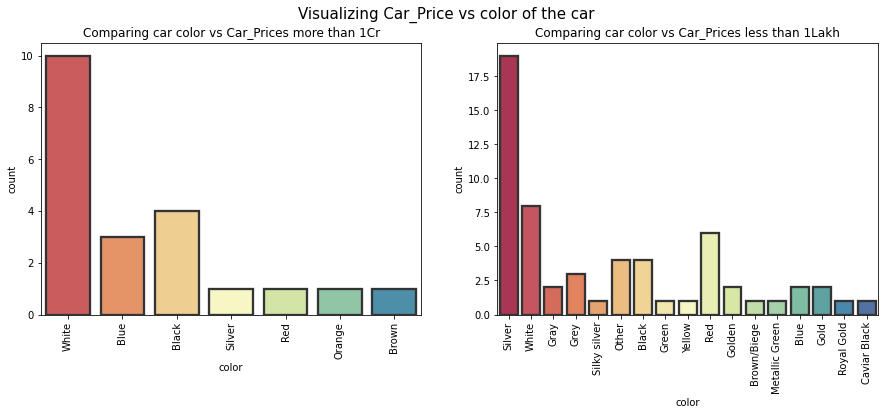

In [111]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs color of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car color vs Car_Prices more than 1Cr")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']>= 10000000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car color vs Car_Prices less than 1Lakh")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']<= 100000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

### Observations:
- **Car_Price vs color:** The first count plot is for the car color vs Car_Prices more than 1 Cr. The plot shows the colors of expensive cars. Thecustomers prefer white colour for more expecnsive cars
- The second graph is for the car color vs car prices below 1 Lakh and it shows the colors of cars which are cheap. From the plot we can say the cars with Silver color and white color have less price.

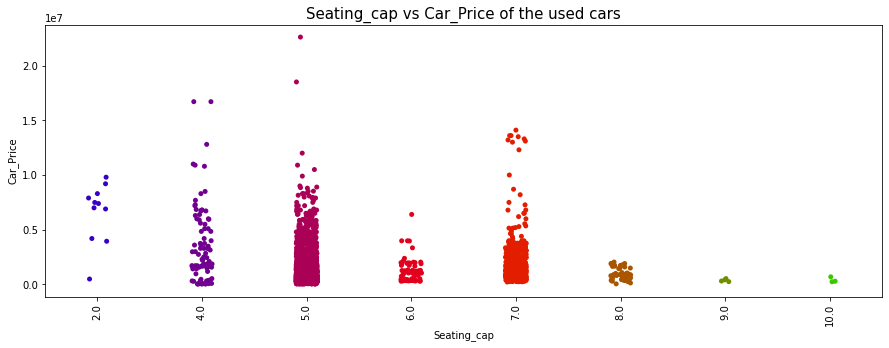

In [112]:
# Comparing Car_Price and Seating_cap of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Seating_cap'],df['Car_Price'],palette="brg");
plt.title('Seating_cap vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs Seating_cap:** Most of the cars have seating capacity of 5, 7 and 4 and these cars having higher prices than other cars.

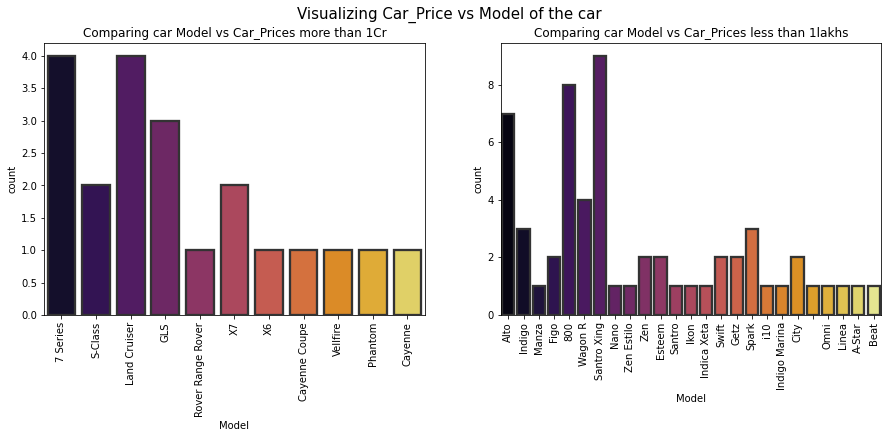

In [113]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs Model of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car Model vs Car_Prices more than 1Cr")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']>= 10000000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car Model vs Car_Prices less than 1lakhs")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']<= 100000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

### Observations:
- **Car_Price vs Model:** The first plot is for car model vs car price more than 1Cr. This plot showing the models of expensive cars. The Rover Range Sport model are expensive compared to other models, It shows some where over priced
- The second plot is for car model vs car price less than 1 Lakh. This plot showing the models which are very cheap. So, from the graph we can say that the car model Alto have very less price.

### Visualizing Numerical Variables vs Car_Price

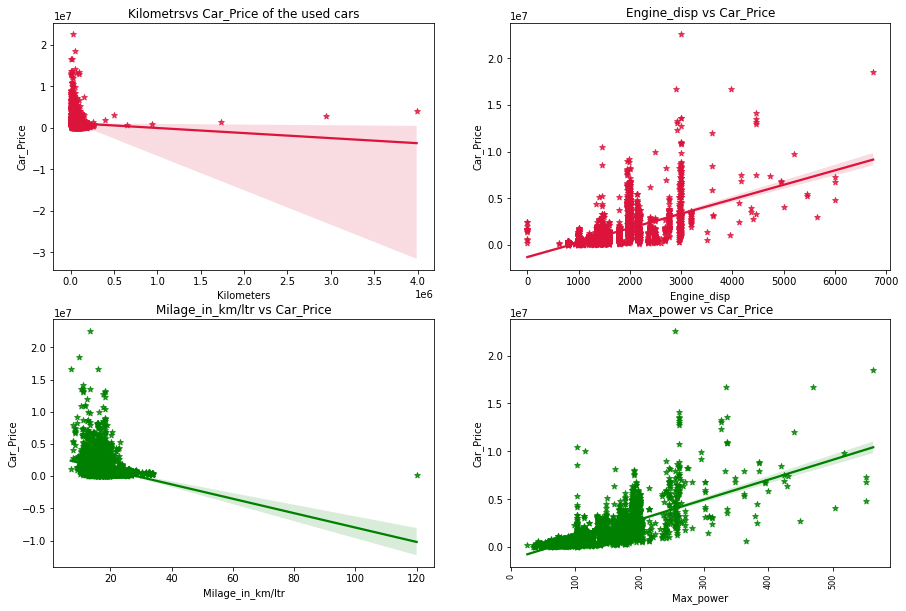

In [114]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'Running_in_kms' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['Kilometers'],y= df['Car_Price'],marker="*",color='crimson')
plt.title('Kilometrsvs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'Engine_disp' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['Engine_disp'],y= df['Car_Price'],marker="*",color='crimson')
plt.title('Engine_disp vs Car_Price',fontsize=12)

# Comparing Car_Price and 'Milage_in_km/ltr' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['Milage_in_km/ltr'],y= df['Car_Price'],marker="*",color='g')
plt.title('Milage_in_km/ltr vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'Max_power' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['Max_power'],y= df['Car_Price'],marker="*",color='g')
plt.title('Max_power vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs Kilometers:** From the plot we can say that the prices of cars are higher for the cars which have less running in kms. We can also notice there is negative linear relation between the price and running of cars.
- **Car_Price vs Engine_disp:** There is a positive correlation between car price and engine displacement. So, we can say as the engine disp or engine cc increases, the price of car also increases.
- **Car_Price vs Milage_in_km/ltr:** The cars having the milage in the range of 10 to 20 km/ltr are having high sale price. From the graph we can also notice there is negative linear/correlation between the price nad milage also some used cars have 0 milage which is unrealistic.
- **Car_Price vs Max_power:** Looking at the graph we can say there is positive correlation between car price and maximum engine power so, we can say as maximum power engine increases, the car prices also go on increasing.

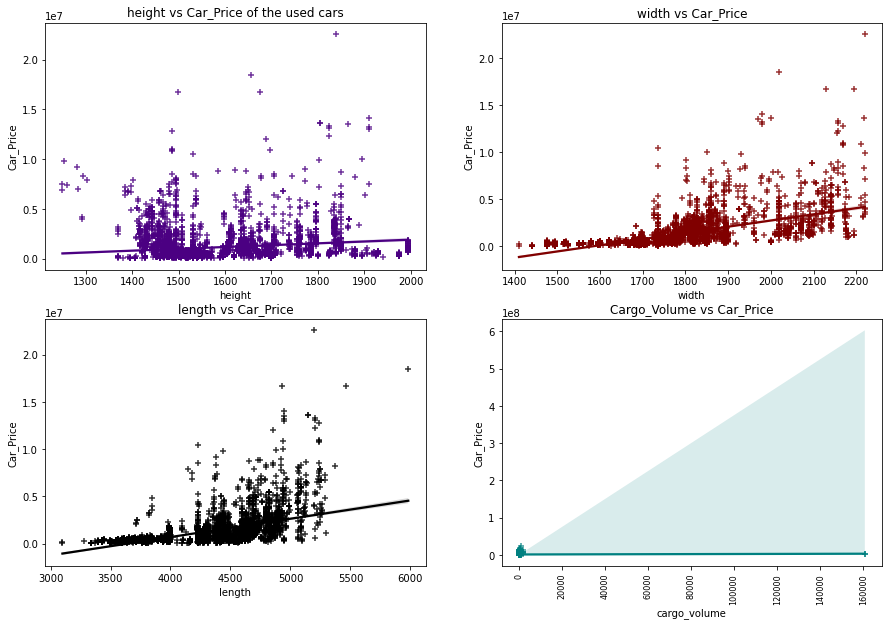

In [115]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'height' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['height'],y= df['Car_Price'],marker="+",color='indigo')
plt.title('height vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'width' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['width'],y= df['Car_Price'],marker="+",color='maroon')
plt.title('width vs Car_Price',fontsize=12)

# Comparing Car_Price and 'length' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['length'],y= df['Car_Price'],marker="+",color='k')
plt.title('length vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'cargo_volume' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['cargo_volume'],y= df['Car_Price'],marker="+",color='teal')
plt.title('Cargo_Volume vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs height:** From the graph it is clear that the car price is not strongly related with the height of the car, we can say the cars having height in the range of 1300 mm to 1800 mm have somewhat high price.
- **Car_Price vs width:** The graph shows there is some positive linear relation between car price and width of the car, so the cars having width in the range of 1700mm to 2200mm have high price. So we can conclude as the width of the car increases, the price of the car also goes on increasing.
- **Car_Price vs length:** There is some positive linear relation between car price and length of the cars. As the length of the cars increases, the price of the cars also increases. The cars that are having the length above 4250mm have high price.
- **Car_Price vs Cargo Valume:** There is some positive linear relation between price of the car and Cargo_Volume.

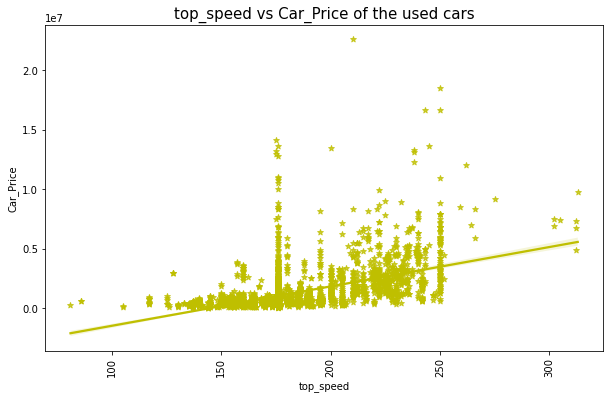

In [116]:
# Comparing Car_Price and 'top_speed' of the used cars
plt.figure(figsize=(10,6))
sns.regplot(x= df['top_speed'],y= df['Car_Price'],marker="*",color='y')
plt.title('top_speed vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs top_speed:** From the graph we can notice there is positive linear relation between car price and maximum speed limit of the car. The cars having top speed in the range of 120 km/hr to 250 km/hr having higher price and there are very less number of cars which have top speed below 100km/hr. So, we can conclude that as the maximum speed limit of the car (top_speed) increases, the car price also increases.

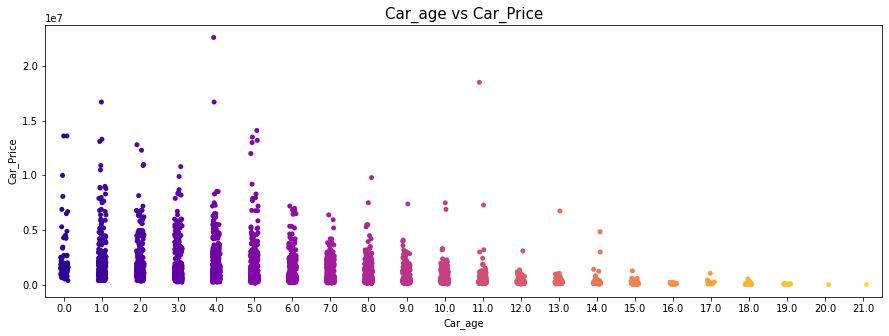

In [117]:
# Comparing Car_Price and 'Car_age' of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Car_age'],df['Car_Price'],palette="plasma")
plt.title('Car_age vs Car_Price',fontsize=15)
plt.show()

### Observations:
- **Car_Price vs Car_age:** From the above strip plot we can say that the older cars are having very lower prices when compared to the new cars that is the cars having very less age. So, there is negative relation between car price and age of the cars and we can conclude as the age decreases, the car prices increases.

**Till now we have checked the relation between the independent variables and dependent variable that is our target column "Car_Price". Now let's check the relation between two independent variables and comppare each of them with others.** 

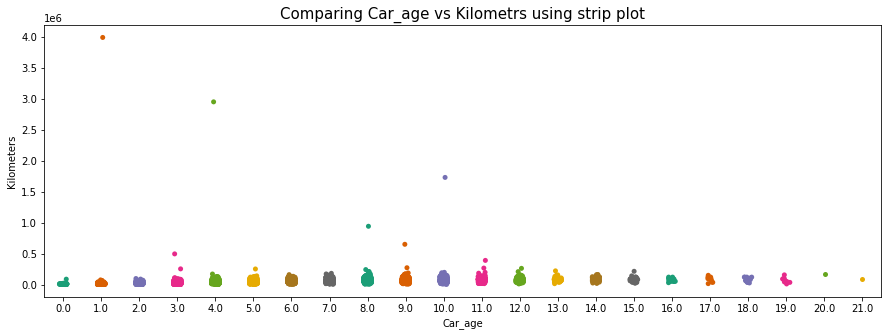

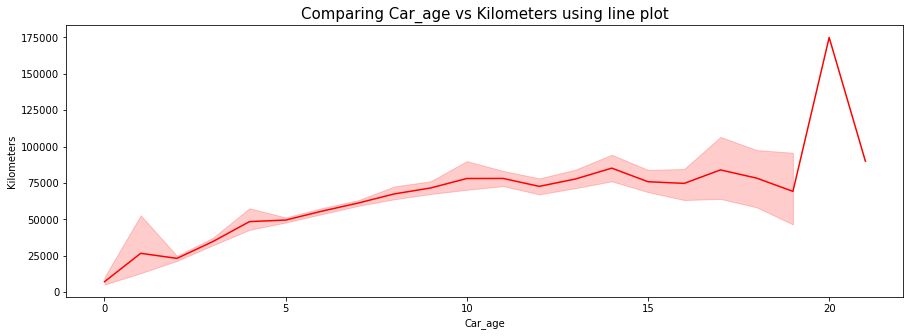

In [118]:
# Checking the relation between car age and running in kms
plt.figure(figsize = (15,5))
sns.stripplot(x = 'Car_age', y = 'Kilometers', data = df, palette = "Dark2")
plt.title("Comparing Car_age vs Kilometrs using strip plot",fontsize=15)

plt.figure(figsize = (15,5))
sns.lineplot(x = 'Car_age', y = 'Kilometers', data = df, color = "r")
plt.title("Comparing Car_age vs Kilometers using line plot",fontsize=15)
plt.show()
plt.show()

### Observations:
- **Car_age vs Running_in_kms:** The above two graphs represents car_age vs Running in kms. The cars which have their age from 2 years to 16 years have highly used. That is the running kms for these cars are around 50k kms.

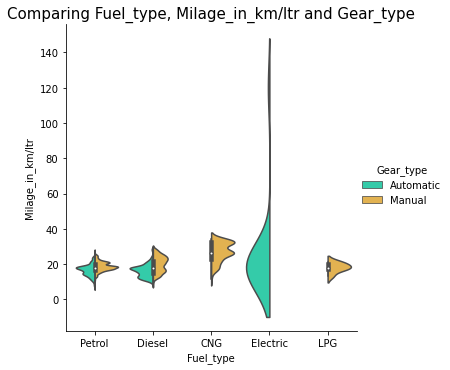

In [119]:
# Lets check the relation between fuel_type, Gear_transmission and Mileage of the cars
sns.catplot(x="Fuel_type", y="Milage_in_km/ltr", hue="Gear_type", kind="violin", split=True, palette="turbo", data=df)
plt.title("Comparing Fuel_type, Milage_in_km/ltr and Gear_type",fontsize=15)
plt.show()

### Observations:
- The above violin plot gives the relation between Milage in km/ltr and Fuel type on the basis of gear transmission. As we can observe the cars with Manual gear transmission which are using CNG as a fuel are having good milage  compared to other fuel types.

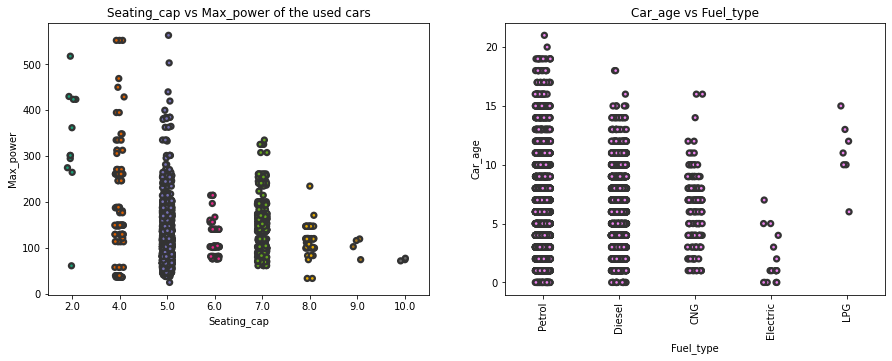

In [120]:
plt.figure(figsize=(15,5))

# Comparing Seating_cap and 'Max_power' of the used cars
plt.subplot(1,2,1)
sns.stripplot(x= df['Seating_cap'],y= df['Max_power'],palette = "Dark2",linewidth=2.3, edgecolor=".2")
plt.title('Seating_cap vs Max_power of the used cars',fontsize=12)

# Comparing Car_age and 'Fuel_type' of the used cars
plt.subplot(1,2,2)
sns.stripplot(x= df['Fuel_type'],y= df['Car_age'],linewidth=2.3, edgecolor=".2",color="violet")
plt.title('Car_age vs Fuel_type',fontsize=12)

plt.xticks(rotation=90)
plt.show()

### Observations:
- **Seating_cap vs Max_power:** The cars with seating capacity 5 have high maximum power of engine used in cars and the cars with 10 seating capacity have very less maximum engine power.
- **Fuel_type vs Car_age:** The cars which are using Patrol and Diesel as fuel they have high age and the cars with low age are using electricity as the fuel.

### Multivariate Analysis

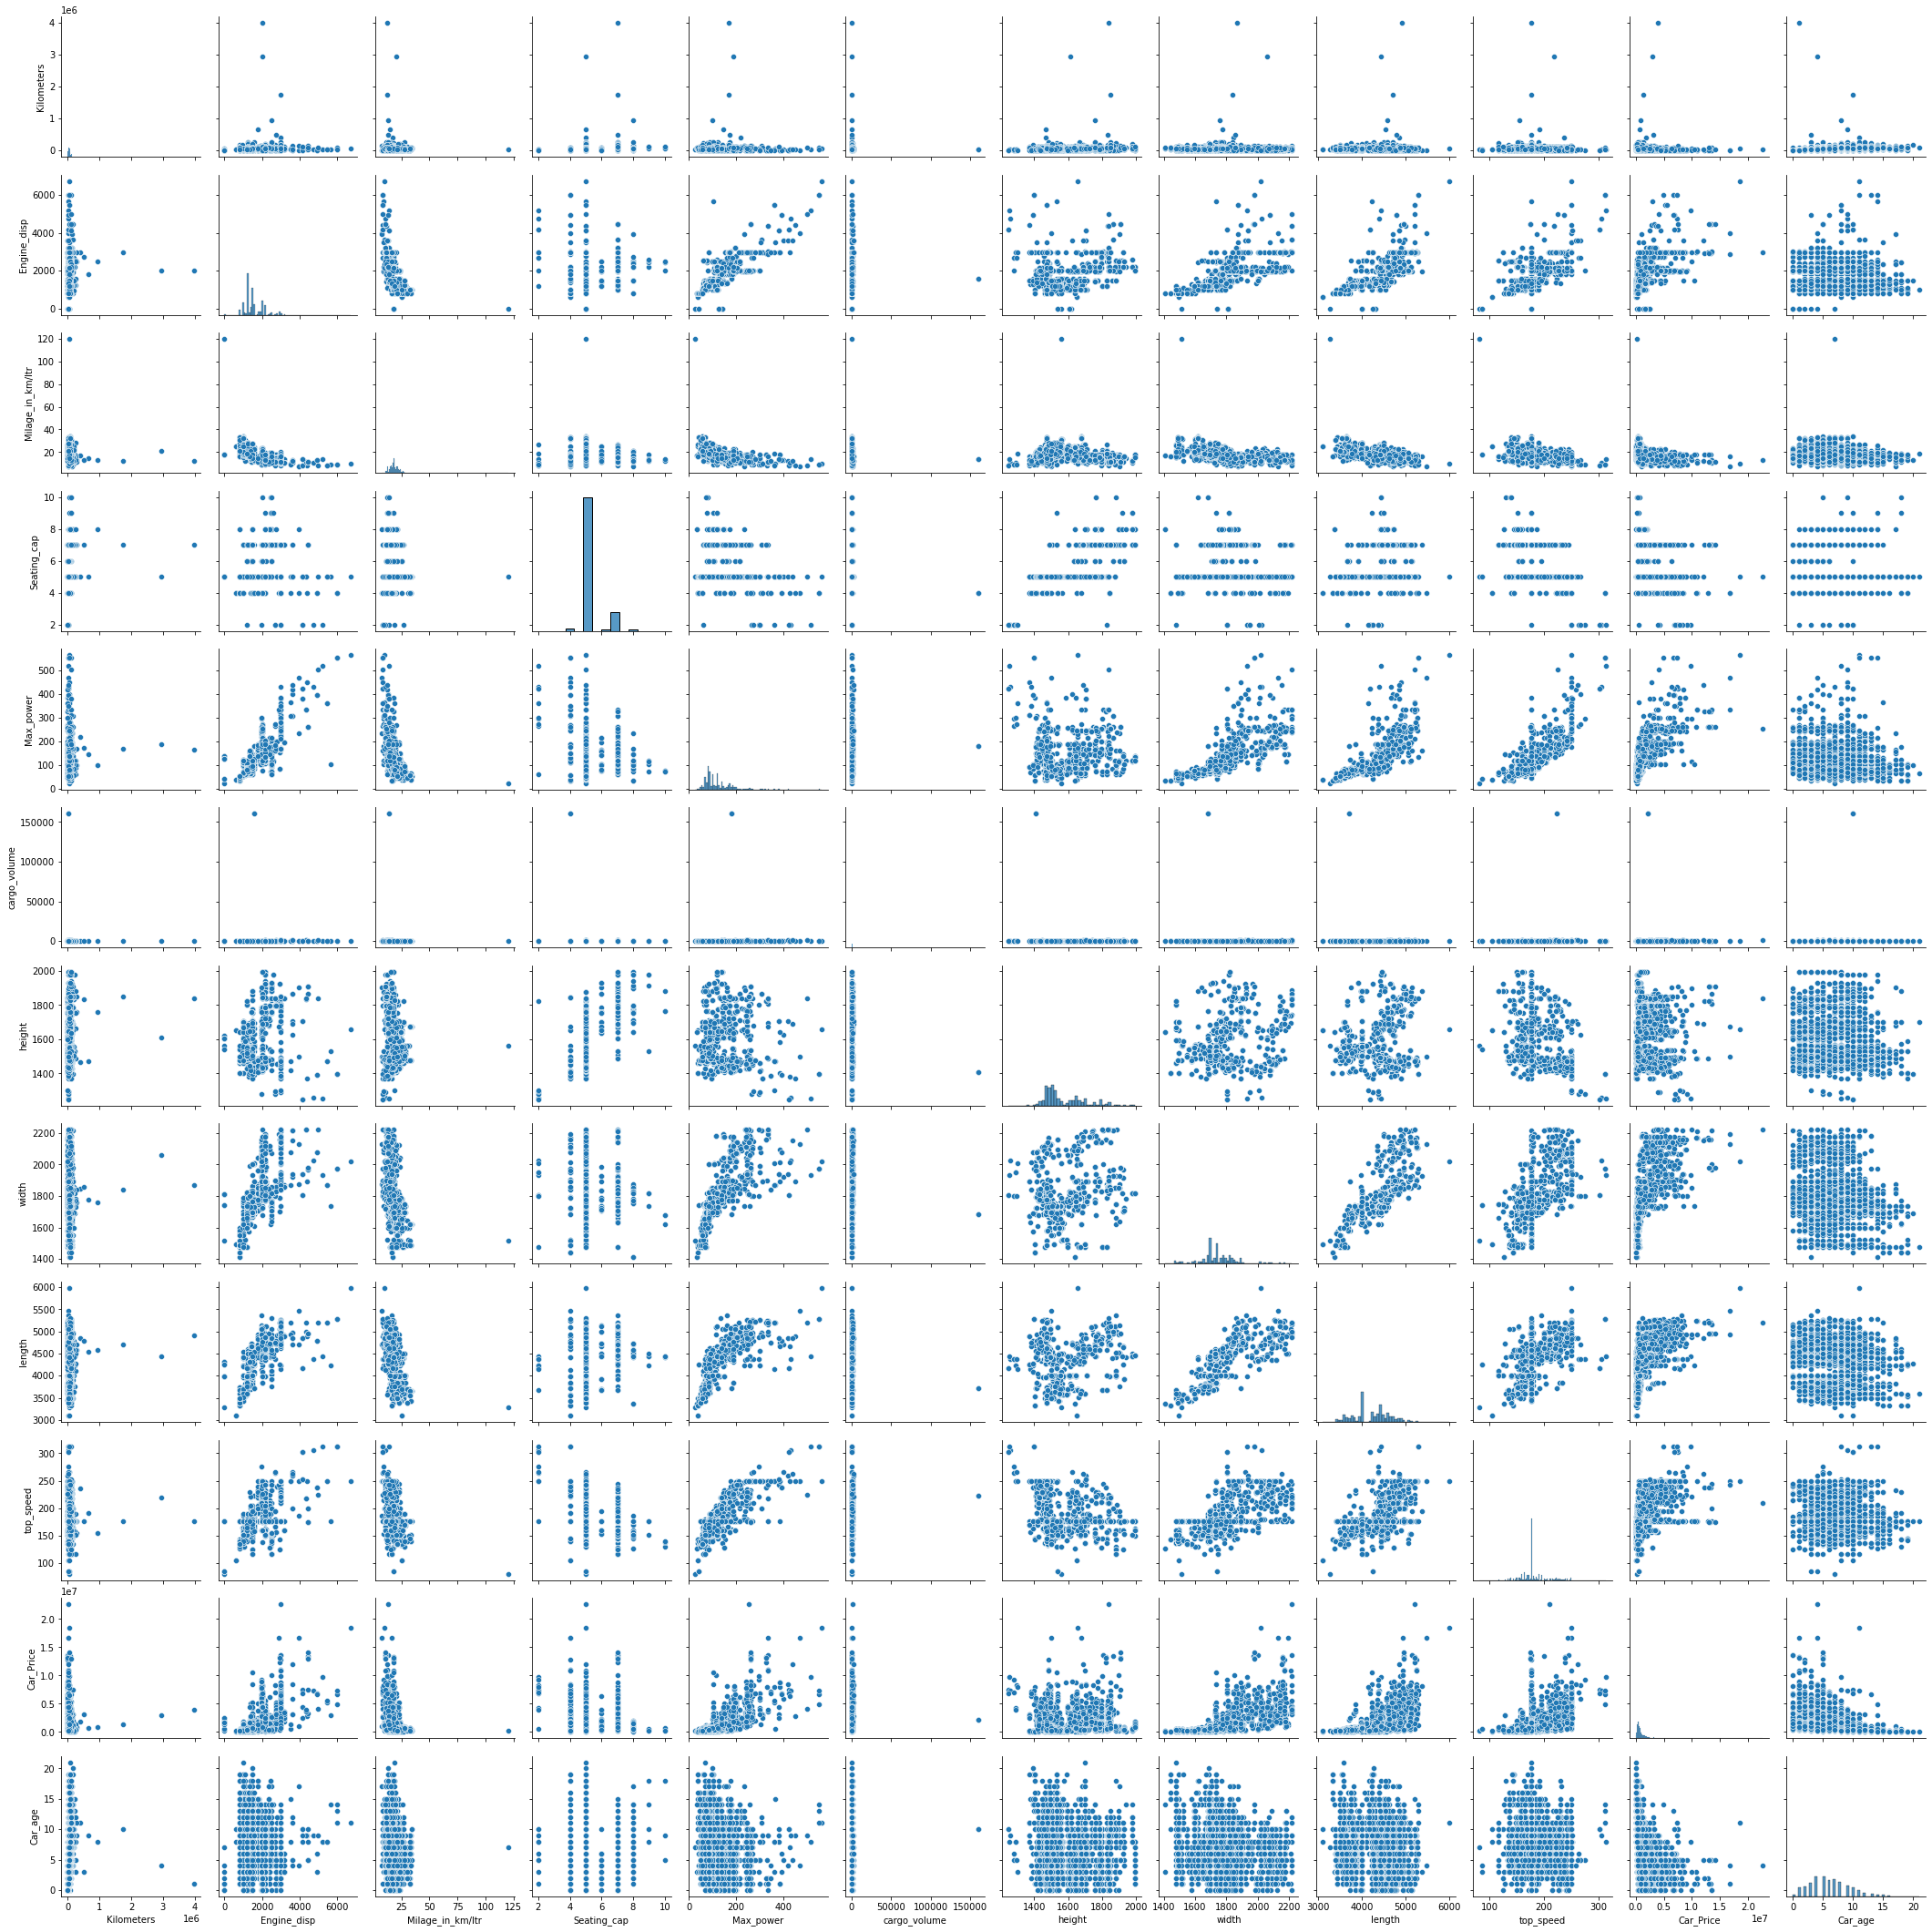

In [159]:
sns.pairplot(df,palette="husl")
plt.show()

- The pairplot gives the pairwise relation between the features on the basis of the target "Car_Price". On the diagonal we can notice the distribution plots.
- From the pair plot we can observe some of the features have strong correlation with each other and some of them have weak correlation with each other.
- We can also find some outliers present in the data, we will remove them using appropriate methods.

## Identifying the outliers in the dataset using boxplots

In [ ]:
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the outliers present in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

- From the above box plots we can observe all the columns contains the outliers. 
- Also the column Car_Price is our target variable, so no need to remove outliers in these two columns. Let's remove the outliers in the remaining columns.

## Removing outliers from dataset
### i) Zscore method

In [122]:
# Features containing outliers
features = df[['Kilometers','Engine_disp','Milage_in_km/ltr','Seating_cap','Max_power','cargo_volume','height','width','length','top_speed','Car_age']]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))

I have listed down the numerical features having outliers and using zscore method to get rid off the outliers in these columns.

In [123]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df.head()

,Model,Brand,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_Price,Car_age
0,Jazz,Honda,Petrol,39821.0,1199.0,Automatic,17.1,5.0,Golden Brown Metallic,88.5,Disc,Drum,354.0,1544.0,1694.0,3989.0,176.0,628000.0,6.0
1,Marazzo,Mahindra,Diesel,41071.0,1497.0,Manual,17.3,7.0,Aqua Marine,121.0,Disc,Disc,190.0,1774.0,1866.0,4585.0,145.0,1015000.0,4.0
2,Grand i10,Hyundai,Petrol,67525.0,1197.0,Manual,18.9,5.0,Pure white,82.0,Disc,Drum,256.0,1520.0,1660.0,3765.0,165.0,451000.0,7.0
3,Compass,Jeep,Petrol,32294.0,1368.0,Automatic,16.0,5.0,Grey,160.7,Disc,Disc,408.0,1640.0,1818.0,4395.0,186.0,1678000.0,3.0
4,City,Honda,Petrol,25542.0,1497.0,Manual,17.8,5.0,Golden,117.3,Disc,Drum,510.0,1495.0,1695.0,4440.0,195.0,733000.0,6.0


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [124]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (5529, 19)
Shape of dataset after removing outliers: (5163, 19)


In [125]:
# Checking the data loss after removing outliers
data_loss = (2931-2663)/2931*100
data_loss

9.143636983964518

By using Zscore I am losing around 9% of data which is acceptable as the acceptable range of data loss is less than 10. 
Let's try to remove outliers using IQR method and check the data loss.

## Checking for skewness in the data

In [126]:
# Checking the skewness
new_df.skew()

Kilometers          0.987336
Engine_disp         1.100589
Milage_in_km/ltr    0.293940
Seating_cap         2.259244
Max_power           0.979790
cargo_volume        1.095046
height              1.034214
width               0.630472
length              0.015674
top_speed           0.846910
Car_Price           3.280507
Car_age             0.485790
dtype: float64

We can find the skewness in all the columns except "Milage_in_km/ltr","width", "length", and "Car_age". Let's remove skewness in the remaining columns.

## Removing skewness using yeo-johnson method

In [129]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ['Kilometers',"Engine_disp","Seating_cap","cargo_volume","Max_power","height","top_speed",'width']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

Using power transformation method to remove the skewness in the data.

In [130]:
new_df[skew1] = scaler.fit_transform(new_df[skew1].values)
new_df[skew1].head()

,Kilometers,Engine_disp,Seating_cap,cargo_volume,Max_power,height,top_speed,width
0,-0.261888,-0.647423,-0.242767,-0.228767,-0.430156,-8.326673e-17,-0.014597,-0.385682
1,-0.217655,0.038997,2.269124,-1.751033,0.452920,1.193490e-15,-1.822254,0.961202
2,0.603736,-0.652290,-0.242767,-1.097257,-0.656557,-2.775558e-16,-0.591263,-0.684986
3,-0.543265,-0.249274,-0.242767,0.212517,1.194032,5.828671e-16,0.460026,0.610979
4,-0.823174,0.038997,-0.242767,0.992888,0.368414,-4.996004e-16,0.852334,-0.377061


In [131]:
# Checking skewness after using yeo-johnson method
new_df[skew1].skew()

Kilometers     -0.032764
Engine_disp     0.319086
Seating_cap    -0.843477
cargo_volume    0.130763
Max_power       0.013931
height          0.000000
top_speed      -0.032920
width          -0.025255
dtype: float64

We can observe the skewness has almost been removed in all the columns but in "Seating_cap". In this column the skewness has been reduced bit, it seems that the data in this column may be important so keeping it as it is.
The column "height" has zero skewness which means it contains only unique entry that is zero throughout the dataset, So we can drop this column.

In [132]:
# Dropping irrelevant colum
new_df.drop("height",axis=1,inplace=True)

## Encoding the categorical columns using Label Encoder Method

In [133]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

Encoded the categorical columns using label encoder.

In [134]:
# Displaying the categorical columns after encoding 
new_df[categorical_col].head()

,Model,Brand,Fuel_type,Gear_type,color,front_brake_type,rear_brake_type
0,113,6,4,0,88,1,4
1,131,14,1,1,7,1,1
2,98,7,4,1,175,1,4
3,57,10,4,0,95,1,1
4,55,6,4,1,86,1,4


The categorical columns(object datatype) have been converted into numerical columns by using label encoding.

## Correlation between the label and features using HEAT map

In [135]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Model,Brand,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,width,length,top_speed,Car_Price,Car_age
Model,1.000000,0.119095,-0.016781,0.011616,-0.109837,0.129249,0.056873,0.066733,0.028105,-0.115545,-0.003724,-0.032623,-0.095974,-0.046699,-0.179561,-0.121102,-0.126016,0.015765
Brand,0.119095,1.000000,-0.061119,0.009646,0.046024,0.027481,-0.027984,0.186247,-0.018486,-0.074304,0.069061,-0.020837,-0.061427,-0.025201,0.036121,-0.152094,-0.009256,-0.069377
Fuel_type,-0.016781,-0.061119,1.000000,-0.314091,-0.459497,0.106512,-0.135909,-0.241648,-0.028549,-0.309812,-0.104409,0.006573,-0.180250,-0.398314,-0.361595,-0.178253,-0.275388,-0.031989
Kilometers,0.011616,0.009646,-0.314091,1.000000,0.163672,0.184234,0.012759,0.154806,0.054143,-0.027867,0.185841,0.066293,0.073316,-0.025908,0.064488,-0.039545,-0.283029,0.591887
Engine_disp,-0.109837,0.046024,-0.459497,0.163672,1.000000,-0.397054,-0.596460,0.311247,0.007355,0.815584,0.094074,-0.059454,0.477054,0.703195,0.801093,0.513910,0.531774,0.025911
Gear_type,0.129249,0.027481,0.106512,0.184234,-0.397054,1.000000,0.362656,0.033476,0.062241,-0.548510,0.028308,0.075749,-0.292432,-0.456834,-0.449863,-0.445947,-0.531235,0.215543
Milage_in_km/ltr,0.056873,-0.027984,-0.135909,0.012759,-0.596460,0.362656,1.000000,-0.225589,-0.034252,-0.635512,0.018954,0.101155,-0.342166,-0.475277,-0.560440,-0.342383,-0.332397,-0.089455
Seating_cap,0.066733,0.186247,-0.241648,0.154806,0.311247,0.033476,-0.225589,1.000000,0.055954,0.147872,0.072817,0.050258,-0.061633,0.148846,0.262640,-0.085488,0.032832,-0.006842
color,0.028105,-0.018486,-0.028549,0.054143,0.007355,0.062241,-0.034252,0.055954,1.000000,-0.033116,0.000107,-0.025235,-0.025612,-0.039059,-0.027534,-0.071462,-0.035509,0.018216
Max_power,-0.115545,-0.074304,-0.309812,-0.027867,0.815584,-0.548510,-0.635512,0.147872,-0.033116,1.000000,0.000624,-0.136440,0.558191,0.836785,0.875724,0.707910,0.654051,-0.138791


The above method gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

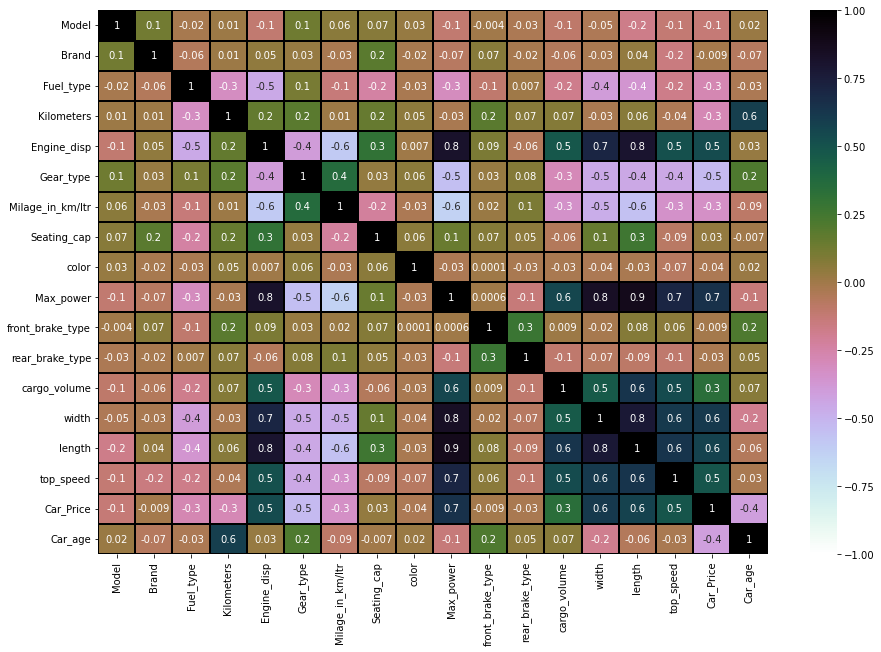

In [136]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="cubehelix_r")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.
- From the heat map we can notice that the dark shades are highly positively correlated and light shades are highly negatively correlated with the target variable.
- The o columns like "Gear_type", "Car_age", "rear_brake_type", "Fuel_type", "Milage_in_km" etc are highly negatively correlated with the target variable "Car_Price".
- We can observe from the map that most of the columns are highly correlated with each other which leads to multicollinearity problem.So, we will check the VIF value and remove the columns having high VIF value to overcome with this multicollinearity problem.

In [137]:
# Checking the positive and negative relation between label and features 
cor['Car_Price'].sort_values(ascending=False)

Car_Price           1.000000
Max_power           0.654051
width               0.613450
length              0.570996
Engine_disp         0.531774
top_speed           0.490044
cargo_volume        0.342887
Seating_cap         0.032832
Brand              -0.009256
front_brake_type   -0.009373
rear_brake_type    -0.028801
color              -0.035509
Model              -0.126016
Fuel_type          -0.275388
Kilometers         -0.283029
Milage_in_km/ltr   -0.332397
Car_age            -0.411910
Gear_type          -0.531235
Name: Car_Price, dtype: float64

Here we can observe the positive and negative correlation between features and label in the descending order.

## Visualizing the correlation between label and features using bar plot

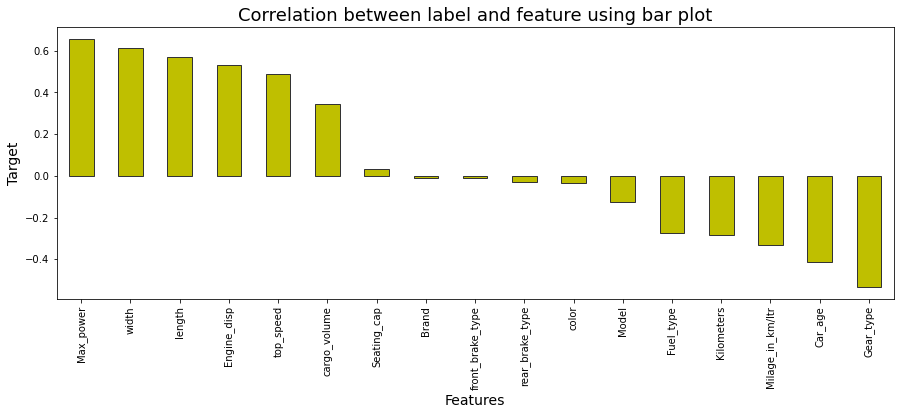

In [138]:
plt.figure(figsize=(15,5))
new_df.corr()['Car_Price'].sort_values(ascending=False).drop(['Car_Price']).plot(kind='bar',color='y',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "color" is less correlated with the label compared to others, we can drop this columns if necessary but for now let's keep it as it is.

## Separating the feature and label into x and y

In [139]:
x = new_df.drop("Car_Price", axis=1)
y = new_df["Car_Price"]

We have separated both dependent and independent variables.

In [140]:
# Dimension of x and y
x.shape, y.shape

((5163, 17), (5163,))

## Feature Scaling Using StandardScaler

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Model,Brand,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,width,length,top_speed,Car_age
0,-0.074188,-0.931196,0.798545,-0.261888,-0.647423,-1.326457,-0.416030,-0.242767,-0.881588,-0.430156,-0.713897,0.161962,-0.228767,-0.385682,-0.544635,-0.014597,-0.043508
1,0.175780,0.179110,-1.214912,-0.217655,0.038997,0.753888,-0.361018,2.269124,-1.853040,0.452920,-0.713897,-1.258550,-1.751033,0.961202,0.966967,-1.822254,-0.653915
2,-0.282495,-0.792408,0.798545,0.603736,-0.652290,0.753888,0.079075,-0.242767,0.161824,-0.656557,-0.713897,0.161962,-1.097257,-0.684986,-1.112754,-0.591263,0.261696
3,-0.851868,-0.376043,0.798545,-0.543265,-0.249274,-1.326457,-0.718594,-0.242767,-0.797635,1.194032,-0.713897,-1.258550,0.212517,0.610979,0.485080,0.460026,-0.959119
4,-0.879642,-0.931196,0.798545,-0.823174,0.038997,0.753888,-0.223489,-0.242767,-0.905574,0.368414,-0.713897,0.161962,0.992888,-0.377061,0.599211,0.852334,-0.043508


We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables after scaling. 

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns in order to overcome with the multicollinearity issue.

## Checking Variance Inflation Factor (VIF)

In [142]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.124810,Model
1,1.164813,Brand
2,2.321998,Fuel_type
3,1.859353,Kilometers
4,4.749824,Engine_disp
5,1.560889,Gear_type
6,3.150118,Milage_in_km/ltr
7,1.495794,Seating_cap
8,1.023966,color
9,10.532840,Max_power


In [143]:
# Dropping Max_power column as it contains high VIF value
x.drop(["Max_power"],axis=1,inplace=True)

In [144]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.117378,Model
1,1.110374,Brand
2,2.317936,Fuel_type
3,1.859289,Kilometers
4,4.243371,Engine_disp
5,1.512344,Gear_type
6,2.844251,Milage_in_km/ltr
7,1.464113,Seating_cap
8,1.023410,color
9,1.195120,front_brake_type


From this we can notice that there no that much multicolinearity problems as all VIf scores were below 10, So we acn proceed further

# Building Machine Learning Models

## Finding the Best Random State and Accuracy

In [145]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9616118909707831  on Random_state  174


Great!!! so with the help of random state selection process we have found our random state to be 174 amongst 1-200 with best accuracy as 96.10% using Random Firest Regressor.

## Feature Importance

In [148]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Engine_disp,0.205
width,0.201
Car_age,0.196
length,0.184
top_speed,0.059
Gear_type,0.028
Kilometers,0.027
cargo_volume,0.026
Model,0.023


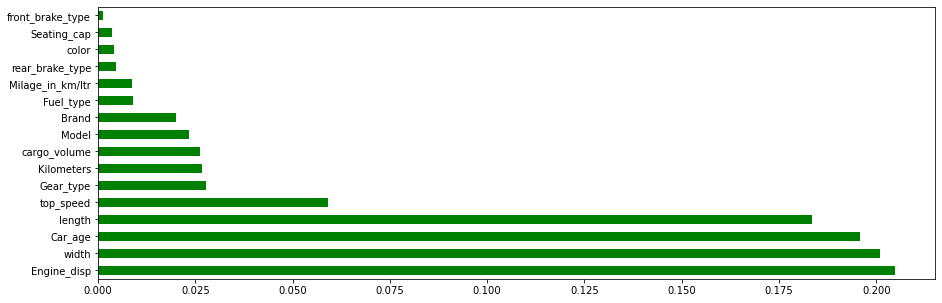

In [149]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="g")
plt.show()

Here with the help of RandomForestClassifier we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Engine_disp"contributing more for prediction which means this feature is important for the predictions

## Creating new train test split

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=174)

I am taking 30 percent of the complete dataset for training purpose and the remaining 70 percent will be used to train the machine learning models using the random state.

## ML Regression Algorithms with Evaluation Metrics

## i) Decision Tree Regressor

R2_Score: 88.10578463182381
Mean Absolute Error: 150036.6049063912
Mean Squared Error: 131035367498.3867
Root Mean Squared Error: 361988.0764588617

Cross Validation Score: 81.09791284489918

R2 Score - Cross Validation Score is 7.007871786924625


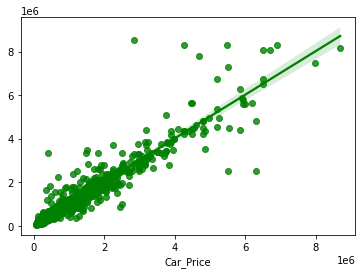

In [151]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Cross Validation Score
cv_score = (cross_val_score(DTR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

- Created Decision Tree Regressor model and checked for its evaluation metrics. The model is giving R2 score as 92.45%. 
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

## ii) Random Forest Regressor

R2_Score: 96.55206328134862
Mean Absolute Error: 104280.4617578161
Mean Squared Error: 37984990270.858284
Root Mean Squared Error: 194897.38395078134

Cross Validation Score: 90.88413671126013

R2 Score - Cross Validation Score is 5.667926570088497


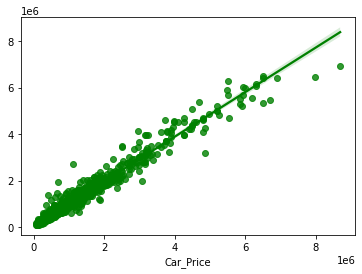

In [152]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Cross Validation Score
cv_score = (cross_val_score(RFR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

- Created Random Forest Regressor model and checked for it's evaluation metrics. The model is giving R2 score as 96.05%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

## iii) Extra Trees Regressor

R2_Score: 95.45682213458382
Mean Absolute Error: 109226.3217817947
Mean Squared Error: 50050967027.06078
Root Mean Squared Error: 223720.73445941656

Cross Validation Score: 91.33081641120015

R2 Score - Cross Validation Score is 4.12600572338367


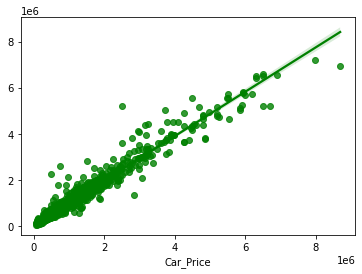

In [153]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Cross Validation Score
cv_score = (cross_val_score(XT, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

- Created Extra Trees Regressor model and checked for its evaluation metrics. The model is giving R2 score as 96.68%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

## iv) GradientBoosting Regressor

R2_Score: 92.9755398820678
Mean Absolute Error: 144360.50048533615
Mean Squared Error: 77386585372.73021
Root Mean Squared Error: 278184.44487916684

Cross Validation Score: 89.38729500522452

R2 Score - Cross Validation Score is 3.588244876843291


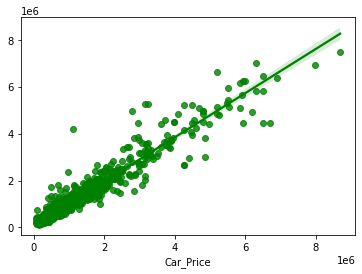

In [157]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Cross Validation Score
cv_score = (cross_val_score(GB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

- Created GradientBoosting Regressor model and checked for its evaluation metrics. The model is giving R2 score as 94.14%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## v) Extreme Gradient Boosting Regressor (XGB)

R2_Score: 96.0983769321466
Mean Absolute Error: 109321.47596861886
Mean Squared Error: 42983130598.44533
Root Mean Squared Error: 207323.7338040325

Cross Validation Score: 91.06889526654273

R2 Score - Cross Validation Score is 5.029481665603882


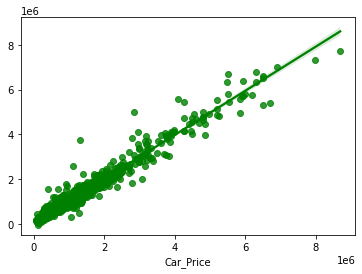

In [155]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Cross Validation Score
cv_score = (cross_val_score(XGB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

- Created XGB Regressor model and checked for its evaluation metrics. The model is giving R2 score as 96.27%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## vi) Bagging Regressor

R2_Score: 95.52667640612965
Mean Absolute Error: 114776.33867010975
Mean Squared Error: 49281401329.7865
Root Mean Squared Error: 221994.14706200364

Cross Validation Score: 88.52735881885033

R2 Score - Cross Validation Score is 6.999317587279322


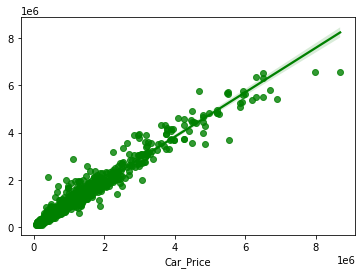

In [156]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 
# Cross Validation Score
cv_score = (cross_val_score(BR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

- Created Bagging Regressor model and checked for its evaluation metrics. The model is giving R2 score as 95.30%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## vii) KNeighbors Regressor

R2_Score: 88.40188533148356
Mean Absolute Error: 170468.3668173015
Mean Squared Error: 127773305832.6584
Root Mean Squared Error: 357453.921271901

Cross Validation Score: 83.7499229171995

R2 Score - Cross Validation Score is 4.651962414284057


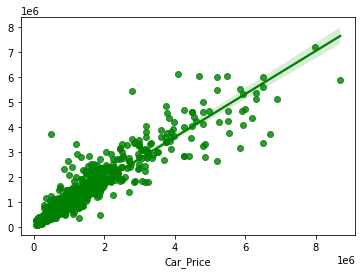

In [158]:
# Checking R2 score for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
R2_score = r2_score(y_test,predknn)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predknn))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predknn))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predknn))) 

# Cross Validation Score
cv_score = (cross_val_score(knn, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predknn,color="g")
plt.show()

- Created KNN Regressor model and checked for its evaluation metrics. The model is giving R2 score as 88.15%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## Model Selection

|Model||R2_Score||Cross_Validation_Score||Difference|
|-------||-------||-------||-------|
|DecisionTreeRegressor||88.10||81.09|7.01|
|RandomForestRegressor||96.5||90.88||5.62|
|ExtraTreesRegressor||95.4||91.33||4.07|
|GradientBoostingRegressor||92.98||89.39||3.59|
|XGBRegressor||96.09||91.06||5.03|
|BaggingRegressor||95.5||88.5||7|
|KNeighborsRegrassor||88.4||83.75||4.65|

**From the difference between R2 score and Cross Validation score, it can be seen that the GradientBoostingRegressor has least difference and low evaluation metrics compared to other models.  So we can conclude that GradientBoostingRegressor as our best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.**

## Hyper Parameter Tuning

In [160]:
# Let's Use the GridSearchCV to find the best paarameters in XGBRegressor
#GradientBoostingRegressor()
parameters = {'n_estimators' : [50,100,150,200],
              'learning_rate':np.arange(0.05,0.5,0.05),
              'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'criterion' : ['friedman_mse', 'squared_error', 'mse']}

In [162]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

Assigning a variable to the GridSearchCV function after entering all the necessary inputs.

In [163]:
# Running GridSearchCV
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [50, 100, 150, 200]})

Now we use our training data set to make the GridSearchCV aware of all the hyper parameters that needs to be applied on our best model.

In [164]:
# Finding best parameters
GCV.best_params_

{'criterion': 'mse',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'n_estimators': 200}

This gives us the list of parameters which will be used further in our final model creation.

R2_Score: 94.49489951745271
Mean absolute error: 126875.39804196706
Mean squared error: 60648209446.09669
Root Mean Squared error: 246268.57177905727


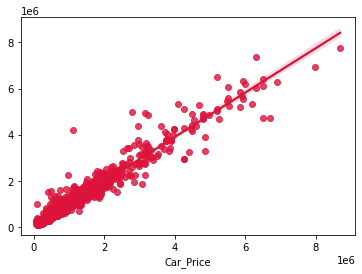

In [165]:
# Creating final model
Car_price_model = GradientBoostingRegressor(criterion='mse', loss='squared_error', n_estimators=200)

# Prediction
Car_price_model.fit(x_train, y_train)
pred = Car_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

- We have successfully incorporated the hyper parameter tuning using best parameters of GradientBoostingRegressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 94.5% which is very good.
- From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given.

## Saving the Final model

In [166]:
# Saving the model using joblib library 
import joblib
joblib.dump(Car_price_model,"UsedCarPricePrediction.pkl")

['UsedCarPricePrediction.pkl']

I am using the joblib option to save the final regression model in the form of .pkl.

## Loading the saved model and predicting Used Car Price

In [167]:
# Loading the saved model
Model=joblib.load("UsedCarPricePrediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([1789103.26254853, 1463971.54710362,  198530.52003545, ...,
        385266.48373907, 2531292.91267151,  633207.33521427])

These are the predicted price of the used cars.

## Creating DataFrame for the predicted values

In [168]:
Predicted_Used_Car_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Predicted_Used_Car_Price

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

Using regression model, we have got the predicted price of the used cars. From the above output we can observe that predicted values are almost near to the actual values.

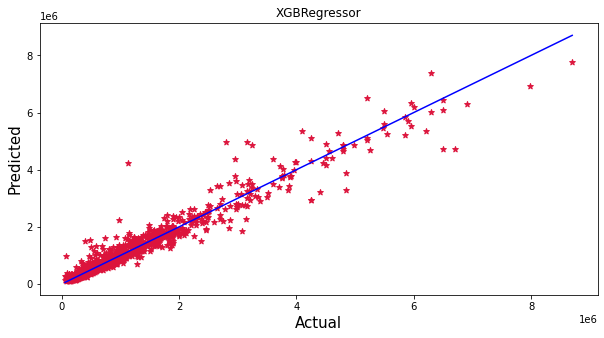

In [169]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the used cars. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data. 

In [170]:
# Saving the predicted car price values in csv file
Predicted_Used_Car_Price.to_csv("Predicted_Used_Car_Price.csv",index=False)

# Conclusion

**Key Findings and Conclusion of the Study:** 
- The case study aims to give an idea of applying Machine Learning algorithms to predict the sale price of the used cars. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.
- First we collected the used cars data from website www.cardekho.com and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 5690 of data which contained the selling price of the used cars and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.
- Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization. 
- From the visualizations we got to know that the continuous numerical variables having some strong positive linear relation with the label "Car_Price". By comparing car price and categorical variables we got to know that the cars having automatic gear transmission, cars from the city Bangalore, cars using petrol and diesel as fuels, cars having the brands Benz and BMW and cars with 5-7 seating capacity have high sale price. While comparing continuous numerical variables and Car_Price we found that cars which are having good milage, engine displacement, less running in kms have good linear relation with the price that is the cars with this kind of qualities have high selling prices.
- After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We tried many algorithms like Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, GradientBoosting Regressor, Extreme Gradient Boosting Regressor (XGBoost), Bagging Regressor and KNeighbors Regressor.
- We got GradientBoosting Regressor as the best model among all the models as it gave least difference of R2 score and cross validation score and also the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The R2 score increased after tuning. So we concluded that   as the best algorithm as it was giving high R2 score after tuning.
- After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values.
- Overall, we can say that this dataset is good for predicting the sale price of used cars using regression analysis and conclude that XGBoost Regressor is the best working algorithm model we obtained. We can improve the data by adding some more features.

## ---------------------------------------------------------------------------------------------------------------------